In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv("All_Service_Requests_-_2023.csv")
# check data
df.head()

,X,Y,SERVICEREQUESTID,STREETADDRESS,CITY,STATE,ZIPCODE,WARD,SERVICECODE,SERVICECODEDESCRIPTION,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,MARADDRESSREPOSITORYID,GLOBALID,CREATED,EDITED,SE_ANNO_CAD_DATA,OBJECTID
0,398389.57,138810.810,23-00000008,2019 5TH STREET NW,WASHINGTON,DC,20001.0,Ward 1,S0261,Parking Enforcement,...,398389.570000,138810.810000,38.917164,-77.018570,229609,{F12E953E-26CA-1E18-E053-782F520AC63D},NaN,NaN,NaN,10579627
1,399970.25,134587.110,23-00000013,401 I STREET SE,WASHINGTON,DC,20003.0,Ward 6,S0261,Parking Enforcement,...,399970.250000,134587.110000,38.879117,-77.000343,288070,{F12F0091-4F4F-7AFF-E053-782F520A8FBD},NaN,NaN,NaN,10579628
2,396870.76,137775.610,23-00000016,1 SCOTT CIRCLE NW,WASHINGTON,DC,20036.0,Ward 2,S0261,Parking Enforcement,...,396870.760000,137775.610000,38.907835,-77.036078,226023,{F12FD71E-2F7B-73EA-E053-782F520A3044},NaN,NaN,NaN,10579629
3,396618.45,139476.897,23-00000019,17TH STREET NW AND EUCLID STREET NW,WASHINGTON,DC,20009.0,Ward 1,11,Dead Animal Collection,...,396618.450011,139476.897005,38.923159,-77.038996,903153,{F133316E-92E2-3EF1-E053-782F520A0ED7},NaN,NaN,NaN,10579630
4,396444.08,139396.240,23-00000031,2375 CHAMPLAIN STREET NW,WASHINGTON,DC,20009.0,Ward 1,S0261,Parking Enforcement,...,396444.080000,139396.240000,38.922432,-77.041006,284376,{F133D25D-1A13-669C-E053-782F520A7D47},NaN,NaN,NaN,10579631


In [3]:
# make new column for due time and actual response time (hours)
for col in ["ADDDATE", "SERVICEDUEDATE", "RESOLUTIONDATE"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

df["DUE_TIME_HOURS"] = (df["SERVICEDUEDATE"] - df["ADDDATE"]).dt.total_seconds() / 3600
df["RESPONSE_TIME_HOURS"] = (df["RESOLUTIONDATE"] - df["ADDDATE"]).dt.total_seconds() / 3600

df[["ADDDATE", "SERVICEDUEDATE", "RESOLUTIONDATE", "DUE_TIME_HOURS", "RESPONSE_TIME_HOURS"]].head()

,ADDDATE,SERVICEDUEDATE,RESOLUTIONDATE,DUE_TIME_HOURS,RESPONSE_TIME_HOURS
0,2023-01-01 05:54:29+00:00,2023-01-03 05:54:28+00:00,2023-01-01 11:36:13+00:00,47.999722,5.695556
1,2023-01-01 06:28:39+00:00,2023-01-03 06:28:38+00:00,2023-01-01 11:36:53+00:00,47.999722,5.137222
2,2023-01-01 07:27:54+00:00,2023-01-03 07:27:53+00:00,2023-01-01 11:37:30+00:00,47.999722,4.160000
3,2023-01-01 11:25:58+00:00,2023-01-04 11:25:58+00:00,2023-01-03 19:49:13+00:00,72.000000,56.387500
4,2023-01-01 12:11:44+00:00,2023-01-03 12:11:44+00:00,2023-01-01 12:30:20+00:00,48.000000,0.310000


(array([0.35421407, 0.08952065, 0.13031399, 0.14460672, 0.13316327,
        0.11267394, 0.09326178, 0.07738226, 0.06230193, 0.04795129,
        0.0321181 , 0.02324595, 0.03073979, 0.05857238, 0.12742997,
        0.18610659, 0.14767606, 0.04225273, 0.13054564, 0.10624569,
        0.17217292, 0.15627023, 0.23303862, 0.23440535, 0.27859234,
        0.35453838, 0.23420845, 0.12634122, 0.11861573, 0.1218009 ,
        0.08808443, 0.06579982, 0.0735948 , 0.06598514, 0.05422897,
        0.04532207, 0.04014472, 0.03927604, 0.03243082, 0.03587081,
        0.04515992, 0.03157372, 0.02385982, 0.0193195 , 0.02973211,
        0.01901836, 0.01315765, 0.00683364, 0.00525843, 0.00116983]),
 array([ 0.        ,  0.20424305,  0.40848609,  0.61272914,  0.81697218,
         1.02121523,  1.22545827,  1.42970132,  1.63394437,  1.83818741,
         2.04243046,  2.2466735 ,  2.45091655,  2.65515959,  2.85940264,
         3.06364569,  3.26788873,  3.47213178,  3.67637482,  3.88061787,
         4.08486091,  4.28

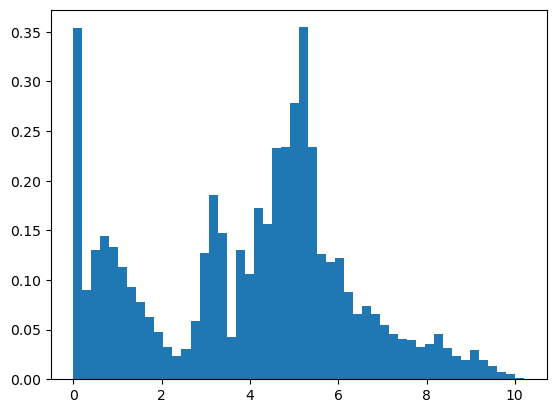

In [4]:
plt.hist(np.log(1+df["RESPONSE_TIME_HOURS"]), bins=50, density=True)

Text(0.5, 1.0, 'Due Time vs Response Time for 311 Service Requests')

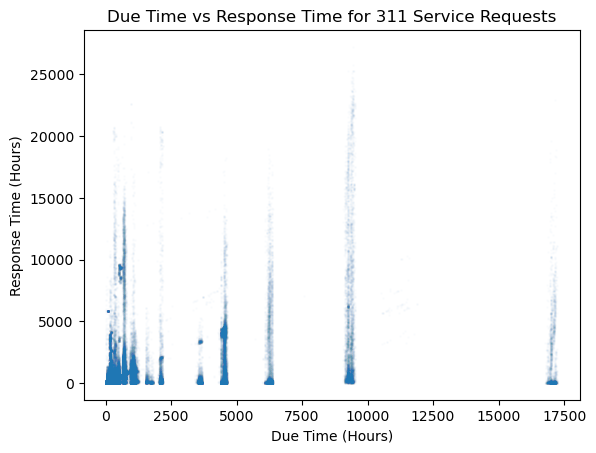

In [5]:
x_min, x_max = df["DUE_TIME_HOURS"].min(), df["DUE_TIME_HOURS"].max()
plt.scatter(df["DUE_TIME_HOURS"], df["RESPONSE_TIME_HOURS"], s=1.0, alpha=0.01)
# plt.plot(np.linspace(x_min, x_max, 100), np.linspace(x_min, x_max, 100), "r--")  # line y=x for reference
# plt.ylim(-1, 48)  # restrict y-axis to 48 hours for better visualization
# plt.xlim(0, 24)  # restrict x-axis to 24 hours for better visualization
plt.xlabel("Due Time (Hours)")
plt.ylabel("Response Time (Hours)")
plt.title("Due Time vs Response Time for 311 Service Requests")


Text(0.5, 1.0, 'Due Time vs Response Time for Parking Enforcement Requests')

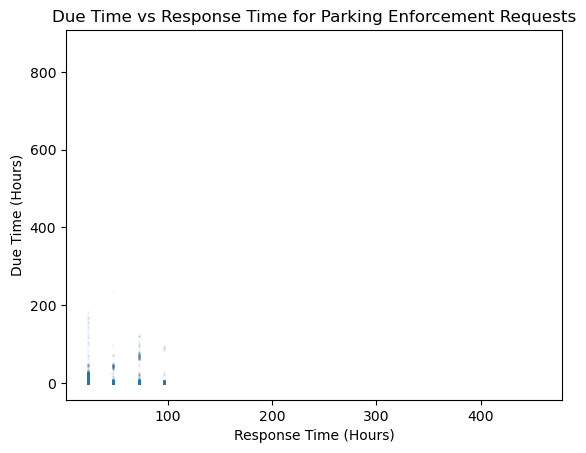

In [6]:
plt.scatter(df[df['SERVICECODEDESCRIPTION'] == "Parking Enforcement"]["DUE_TIME_HOURS"],
            df[df['SERVICECODEDESCRIPTION'] == "Parking Enforcement"]["RESPONSE_TIME_HOURS"], s=1.0, alpha=0.01)
plt.xlabel("Response Time (Hours)")
plt.ylabel("Due Time (Hours)")
# plt.xlim(0, 24)  # restrict x-axis to 24 hours for better visualization
# plt.ylim(-1, 48)  # restrict y-axis to 48 hours for better visualization
plt.title("Due Time vs Response Time for Parking Enforcement Requests")

In [7]:
# now filter by ward: plot histograms for actual response times for different wards 
df_ward = df.dropna(subset=["WARD"]).groupby("WARD", as_index=False)

Ward 1
Ward 6
Ward 2
Ward 5
Ward 7
Ward 4
Ward 8
Ward 3
Null


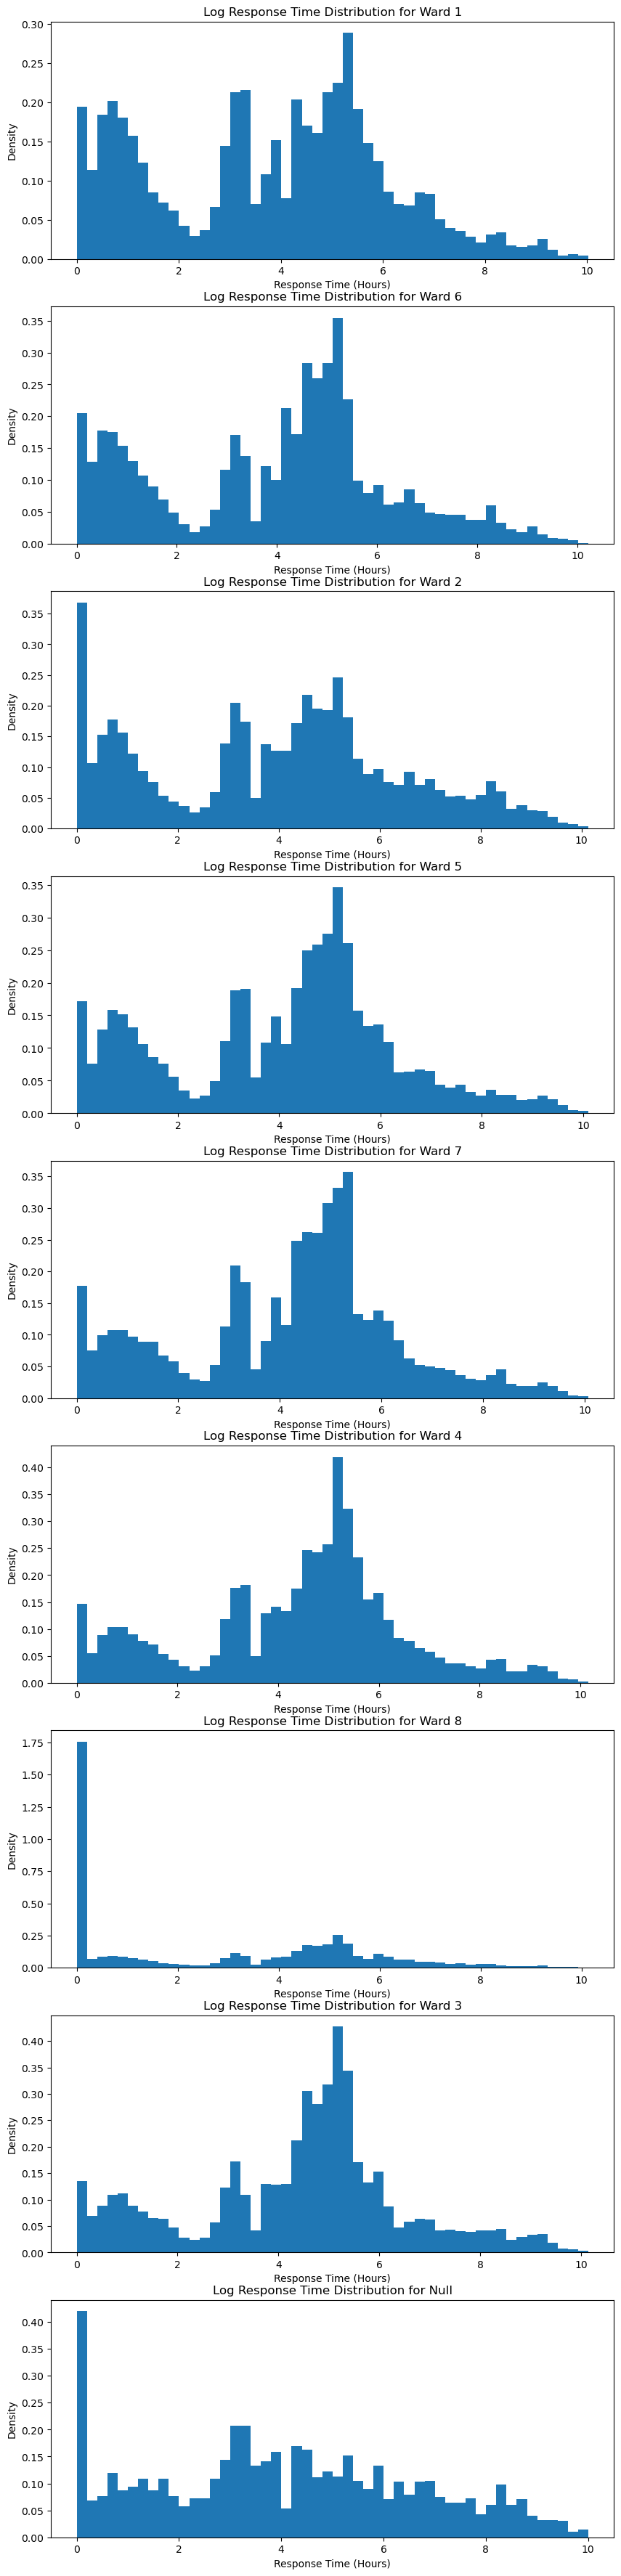

In [8]:
# plot histograms of response times for each ward
# get unique wards
wards = df.dropna(subset=["WARD"])["WARD"].unique()
fig, axs = plt.subplots(len(wards), 1, figsize=(10, 5 * len(wards)))
for i, ward in enumerate(wards):
    print(ward)
    axs[i].hist(np.log(df[df["WARD"] == ward]["RESPONSE_TIME_HOURS"] + 1), bins=50, density=True)
    axs[i].set_title(f"Log Response Time Distribution for {ward}")
    axs[i].set_xlabel("Response Time (Hours)")
    axs[i].set_ylabel("Density")

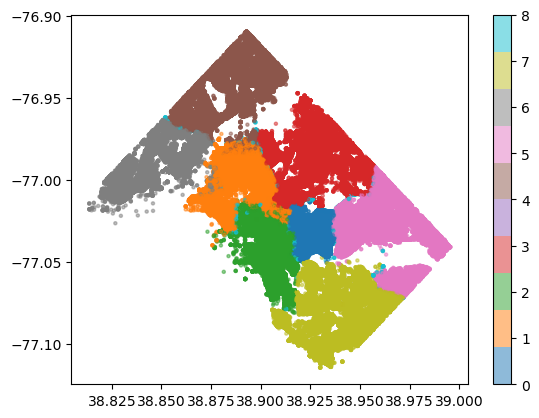

In [9]:
# convert wards to numerical data for plotting
ward_to_num = {ward: i for i, ward in enumerate(df.WARD.unique())}
df['WARD_NUM'] = df['WARD'].map(ward_to_num)

plt.scatter(df.LATITUDE, df.LONGITUDE, alpha=0.5, s=5, c=df.WARD_NUM, cmap='tab10')
plt.colorbar()

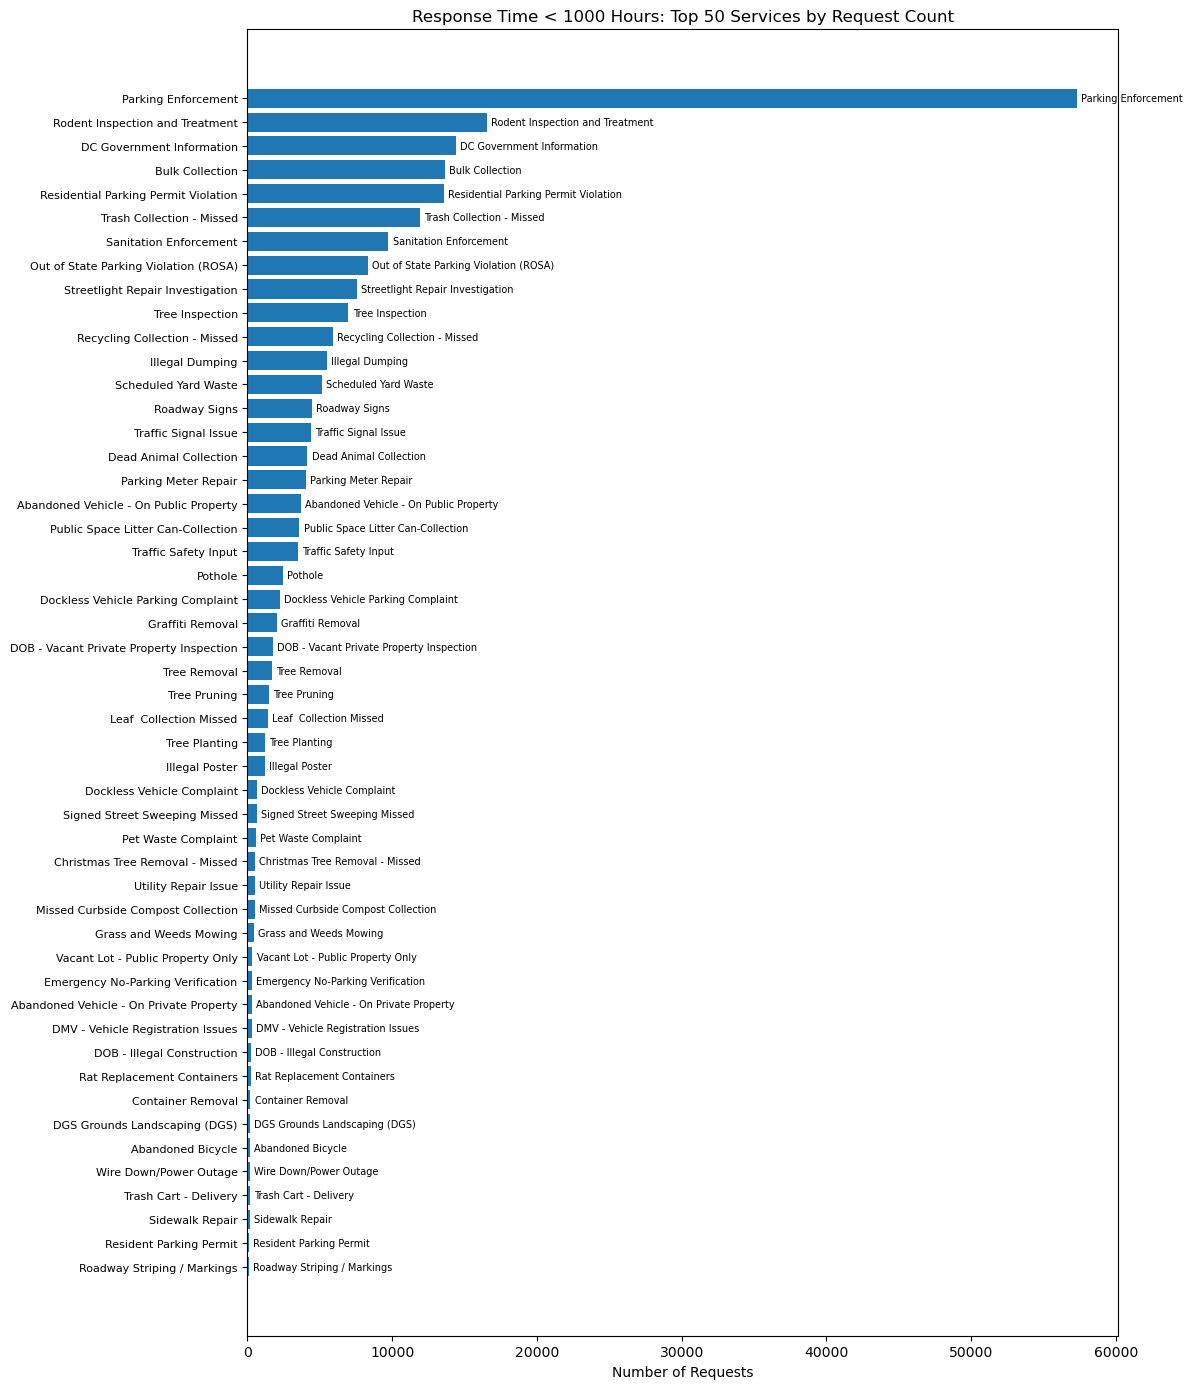

In [10]:
# Analysis 1: Response time < 1000 hours - Top 50 services by count
df_lt_1000 = df[df["RESPONSE_TIME_HOURS"] < 100]
service_counts_lt = df_lt_1000.groupby("SERVICECODEDESCRIPTION").size().sort_values(ascending=False).head(50)

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(range(len(service_counts_lt)), service_counts_lt.values)
ax.set_yticks(range(len(service_counts_lt)))
ax.set_yticklabels(service_counts_lt.index, fontsize=8)
ax.invert_yaxis()  # Top service at top
ax.set_xlabel("Number of Requests")
ax.set_title("Response Time < 1000 Hours: Top 50 Services by Request Count")
for i, (bar, label) in enumerate(zip(bars, service_counts_lt.index)):
    ax.text(bar.get_width() + max(service_counts_lt) * 0.005, bar.get_y() + bar.get_height()/2,
            label, va="center", fontsize=7, wrap=True)
plt.tight_layout()
plt.show()

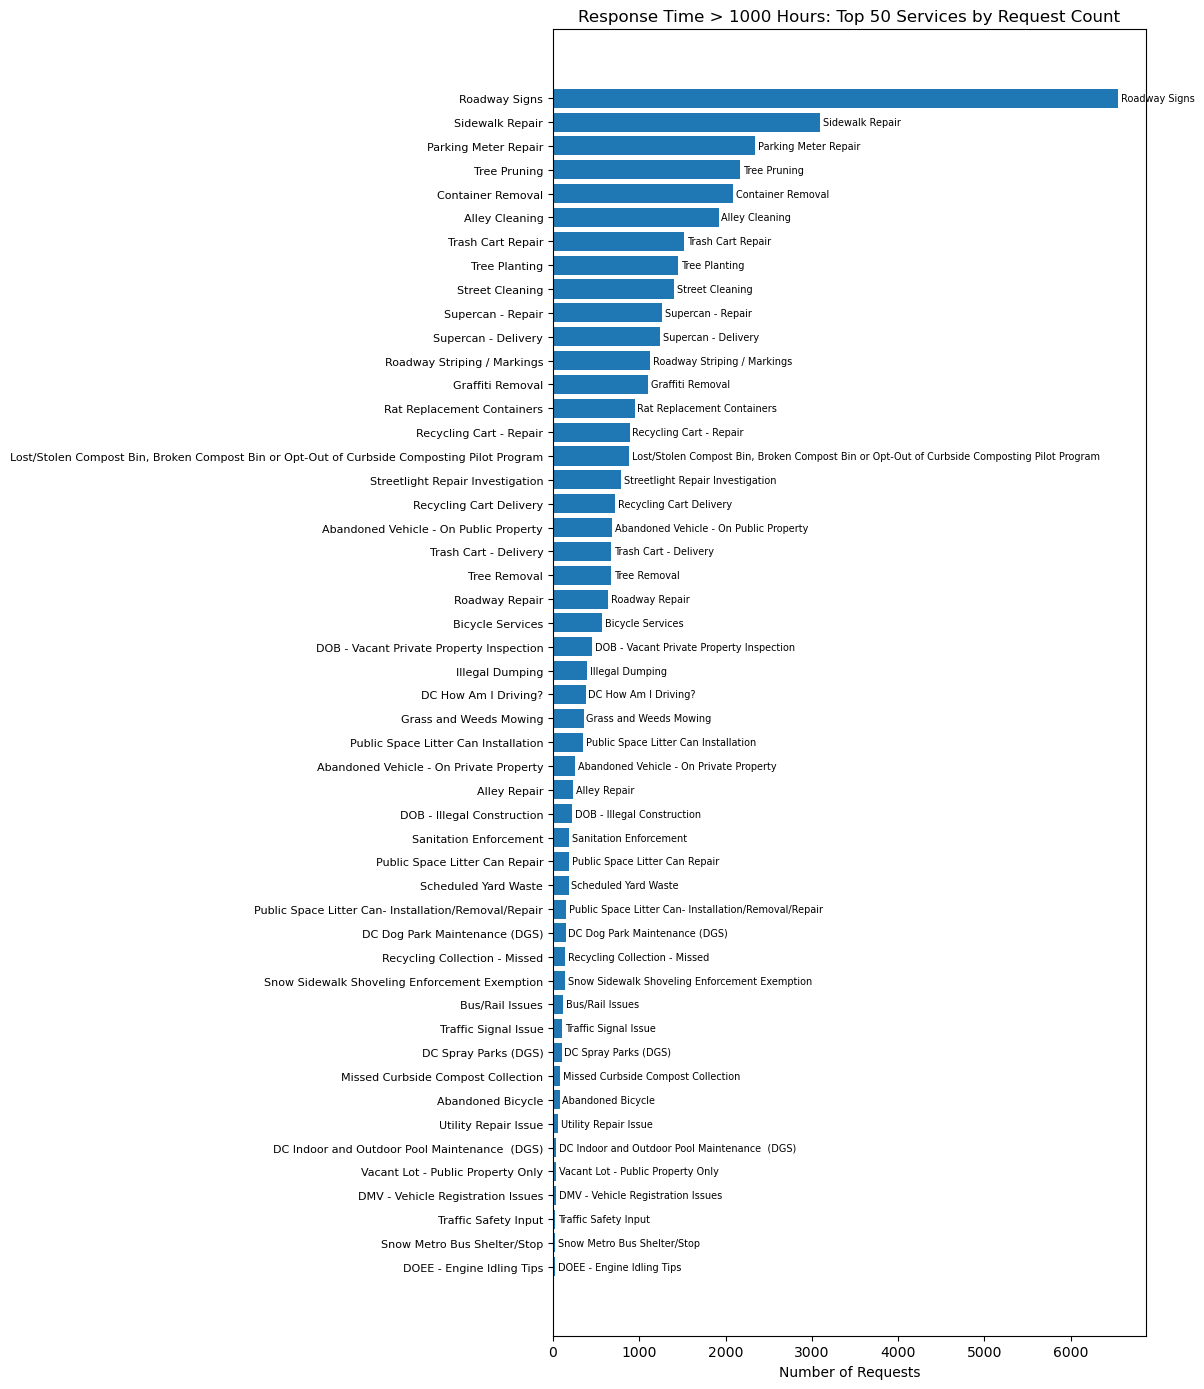

In [14]:
# Analysis 2: Response time > 1000 hours - Top 50 services by count
df_gt_1000 = df[df["RESPONSE_TIME_HOURS"] > 1000]
service_counts_gt = df_gt_1000.groupby("SERVICECODEDESCRIPTION").size().sort_values(ascending=False).head(50)

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(range(len(service_counts_gt)), service_counts_gt.values)
ax.set_yticks(range(len(service_counts_gt)))
ax.set_yticklabels(service_counts_gt.index, fontsize=8)
ax.invert_yaxis()  # Top service at top
ax.set_xlabel("Number of Requests")
ax.set_title("Response Time > 1000 Hours: Top 50 Services by Request Count")
for i, (bar, label) in enumerate(zip(bars, service_counts_gt.index)):
    ax.text(bar.get_width() + max(service_counts_gt) * 0.005, bar.get_y() + bar.get_height()/2,
            label, va="center", fontsize=7, wrap=True)
plt.tight_layout()
plt.show()

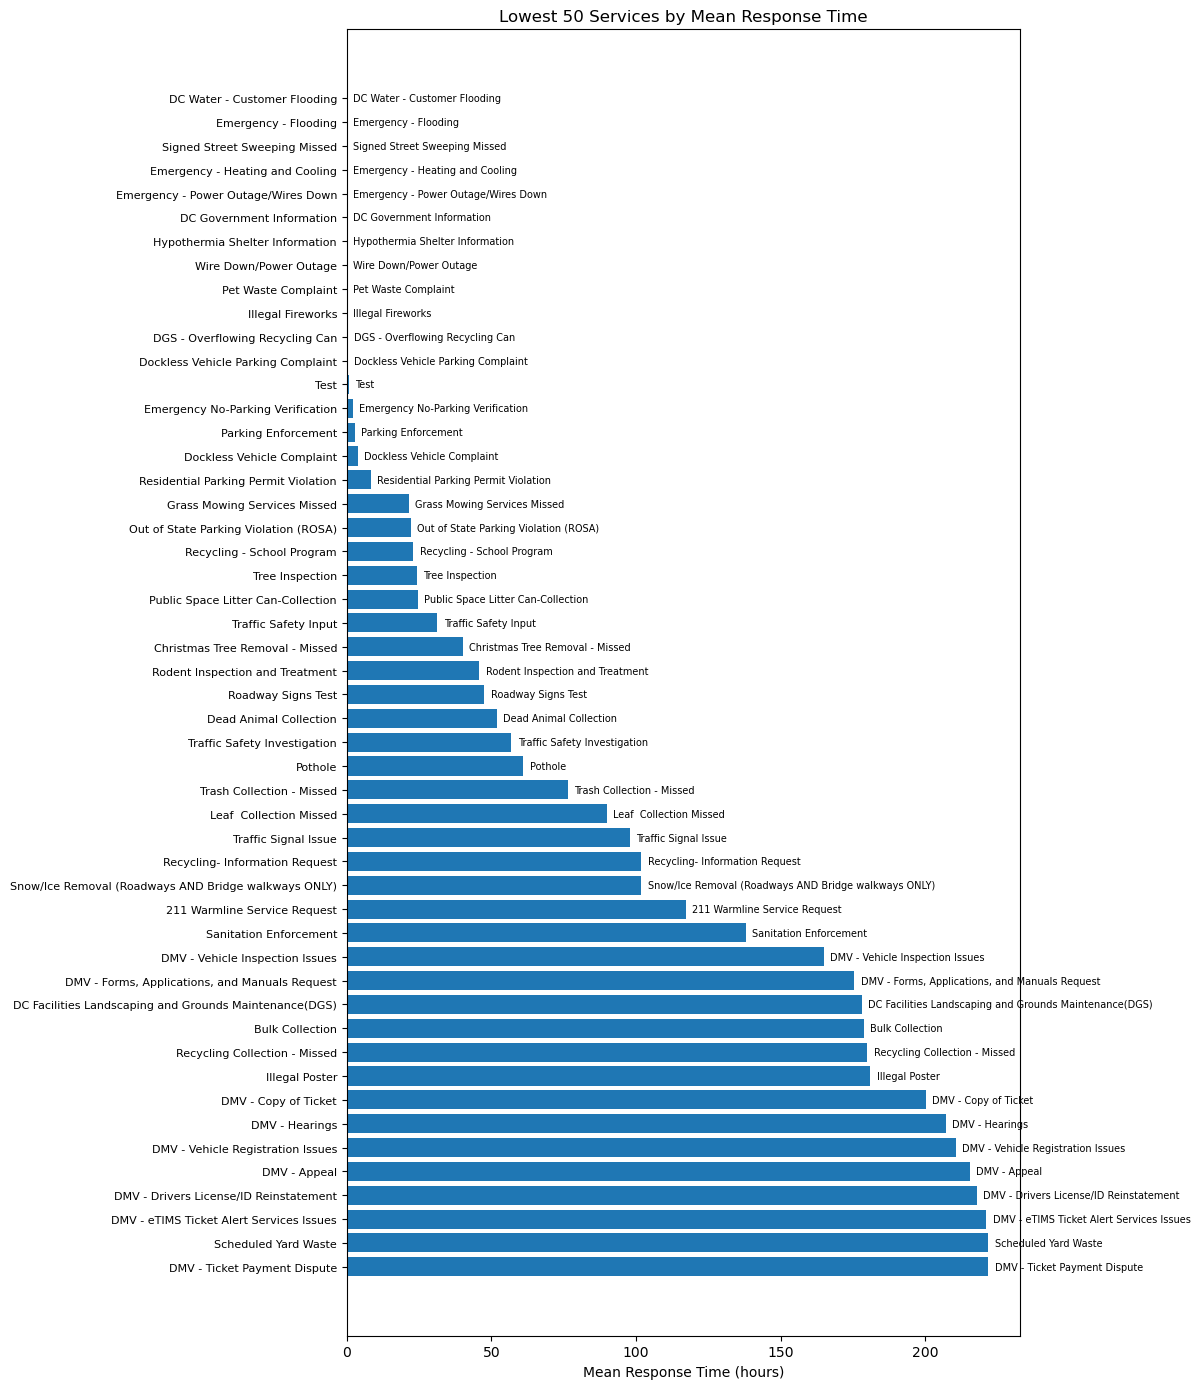

In [15]:
# Mean response time by service type - Lowest 50 services (by lowest mean response time)
mean_response_by_service = df.groupby("SERVICECODEDESCRIPTION")["RESPONSE_TIME_HOURS"].mean().sort_values(ascending=True).head(50)

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(range(len(mean_response_by_service)), mean_response_by_service.values)
ax.set_yticks(range(len(mean_response_by_service)))
ax.set_yticklabels(mean_response_by_service.index, fontsize=8)
ax.invert_yaxis()  # Lowest mean at top
ax.set_xlabel("Mean Response Time (hours)")
ax.set_title("Lowest 50 Services by Mean Response Time")
for bar, label in zip(bars, mean_response_by_service.index):
    ax.text(bar.get_width() + max(mean_response_by_service) * 0.01, bar.get_y() + bar.get_height()/2,
            label, va="center", fontsize=7)
plt.tight_layout()
plt.show()

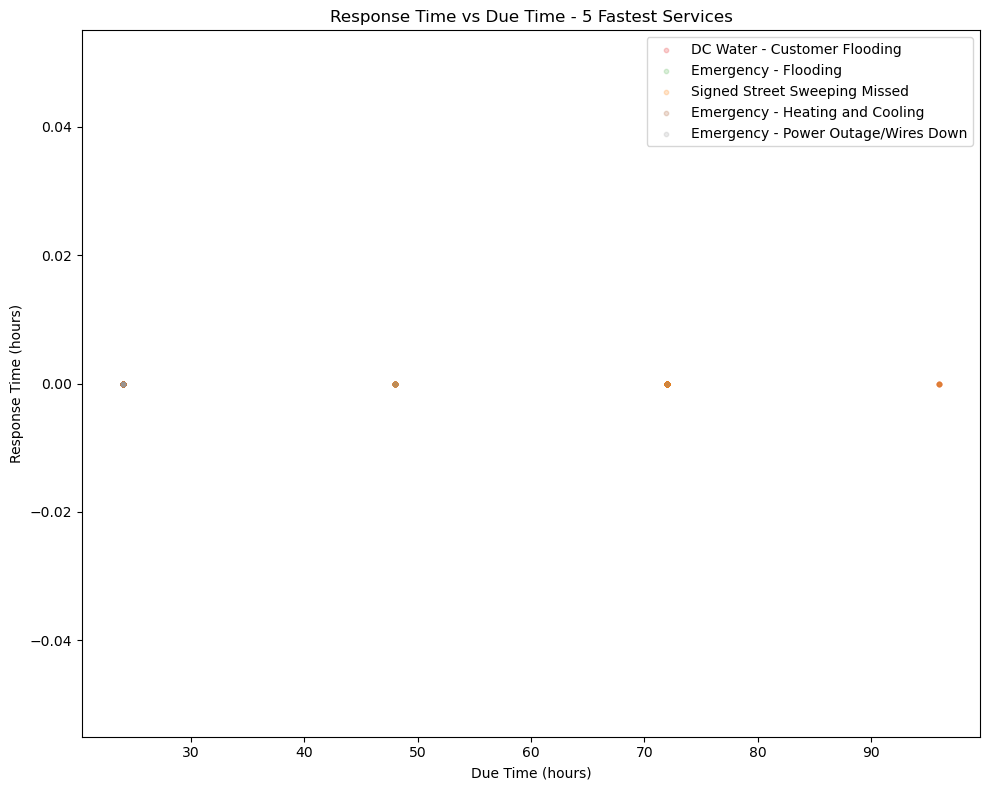

In [16]:
# Filter for 5 services with smallest mean response times
top_5_services = df.groupby("SERVICECODEDESCRIPTION")["RESPONSE_TIME_HOURS"].mean().sort_values(ascending=True).head(5).index.tolist()
df_top5 = df[df["SERVICECODEDESCRIPTION"].isin(top_5_services)]

# Scatter: response time vs due time, colored by service type
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Set1(np.linspace(0, 1, 5))
for i, svc in enumerate(top_5_services):
    mask = df_top5["SERVICECODEDESCRIPTION"] == svc
    ax.scatter(df_top5.loc[mask, "DUE_TIME_HOURS"], df_top5.loc[mask, "RESPONSE_TIME_HOURS"],
               alpha=0.2, s=10, c=[colors[i]], label=svc)

ax.set_xlabel("Due Time (hours)")
ax.set_ylabel("Response Time (hours)")
ax.set_title("Response Time vs Due Time - 5 Fastest Services")
ax.legend()
plt.tight_layout()
plt.show()

In [17]:
df_top5.SERVICECODEDESCRIPTION.unique()

<ArrowStringArray>
[      'Signed Street Sweeping Missed', 'Emergency - Power Outage/Wires Down',
        'DC Water - Customer Flooding',     'Emergency - Heating and Cooling',
                'Emergency - Flooding']
Length: 5, dtype: str

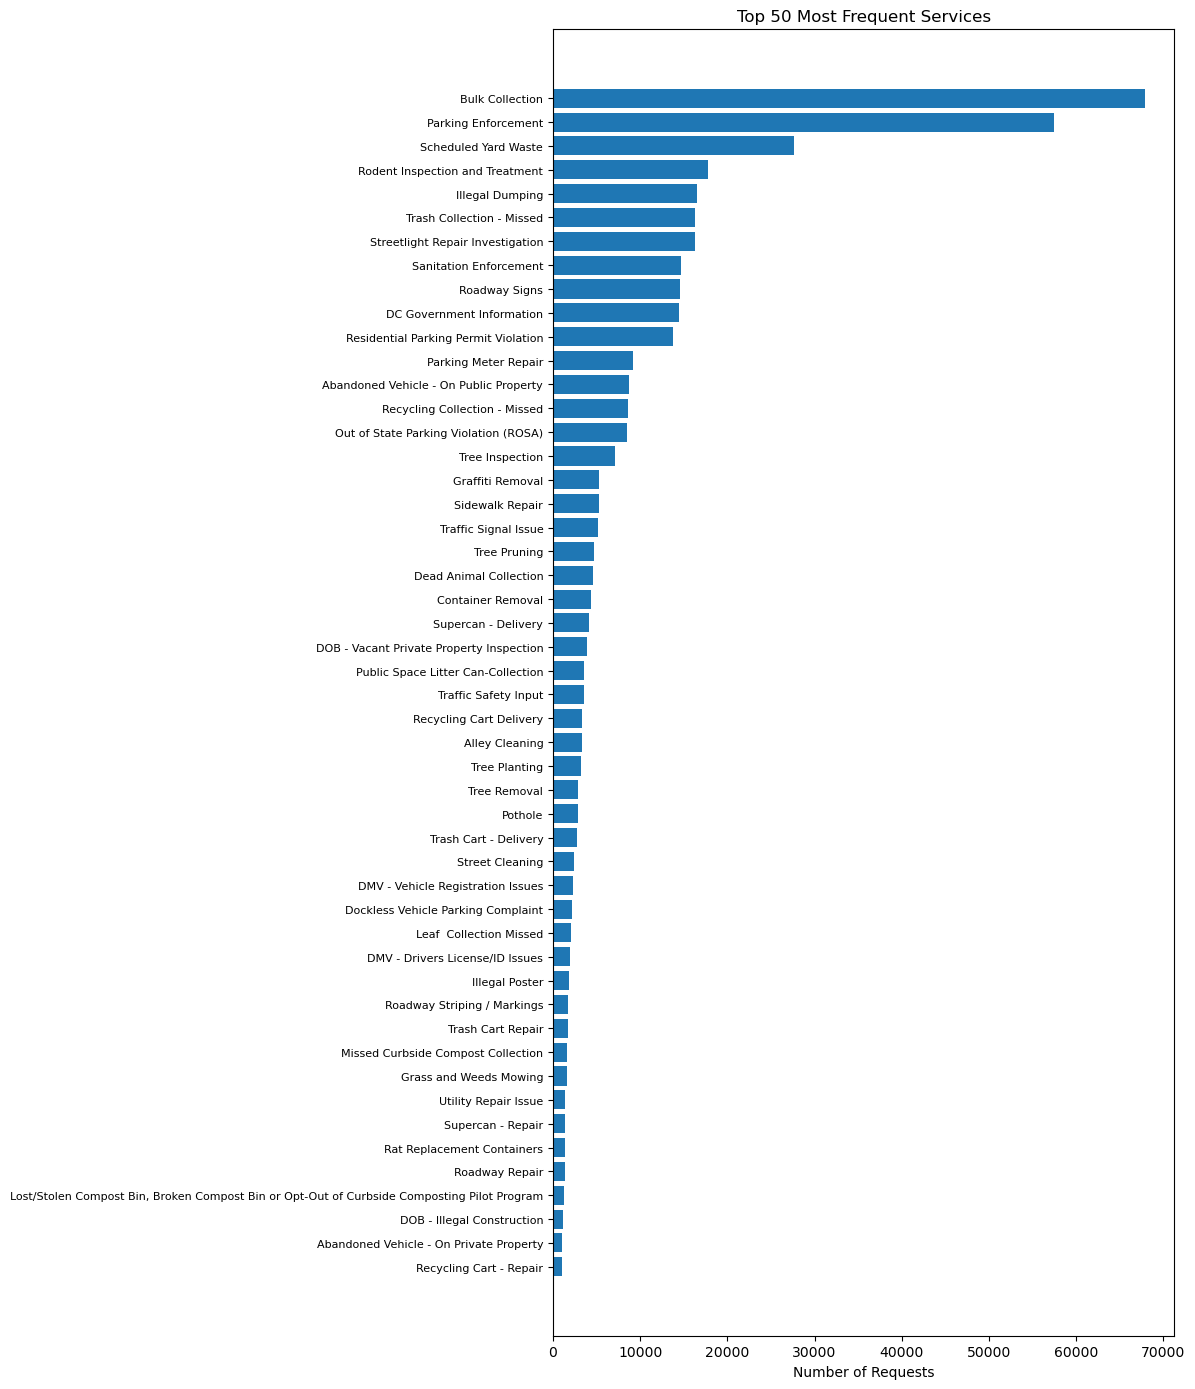

In [18]:
# Frequency of each service type - Top 50 most frequent
service_freq = df["SERVICECODEDESCRIPTION"].value_counts().head(50)

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(range(len(service_freq)), service_freq.values)
ax.set_yticks(range(len(service_freq)))
ax.set_yticklabels(service_freq.index, fontsize=8)
ax.invert_yaxis()  # Most frequent at top
ax.set_xlabel("Number of Requests")
ax.set_title("Top 50 Most Frequent Services")
plt.tight_layout()
plt.show()

# Requested Analysis

1. Number of requests per day/week/year/service/ward
2. For every ward: histograms of requests per day and per week of year
3. For every ward: top 50 services

In [19]:
# Extract date components for grouping
df['DATE'] = df['ADDDATE'].dt.date
df['WEEK'] = df['ADDDATE'].dt.isocalendar().week
df['YEAR'] = df['ADDDATE'].dt.year
df['DAY_OF_YEAR'] = df['ADDDATE'].dt.dayofyear

# 1. Number of requests per day
requests_per_day = df.groupby('DATE').size().reset_index(name='num_requests')
print("Requests per day:")
print(requests_per_day)
print(f"\nTotal unique days: {len(requests_per_day)}")
print(f"Average requests per day: {requests_per_day['num_requests'].mean():.2f}")

Requests per day:
           DATE  num_requests
0    2023-01-01           324
1    2023-01-02           749
2    2023-01-03          1585
3    2023-01-04          1644
4    2023-01-05          1560
..          ...           ...
361  2023-12-28          1064
362  2023-12-29          1021
363  2023-12-30           537
364  2023-12-31           414
365  2024-01-01            30

[366 rows x 2 columns]

Total unique days: 366
Average requests per day: 1161.87


In [20]:
# 2. Number of requests per week
requests_per_week = df.groupby(['YEAR', 'WEEK']).size().reset_index(name='num_requests')
print("Requests per week:")
print(requests_per_week)
print(f"\nTotal unique weeks: {len(requests_per_week)}")
print(f"Average requests per week: {requests_per_week['num_requests'].mean():.2f}")

Requests per week:
    YEAR  WEEK  num_requests
0   2023     1          8337
1   2023     2          7228
2   2023     3          6124
3   2023     4          6673
4   2023     5          6486
5   2023     6          6867
6   2023     7          6810
7   2023     8          6591
8   2023     9          7307
9   2023    10          7223
10  2023    11          7150
11  2023    12          7392
12  2023    13          7879
13  2023    14          8677
14  2023    15          8704
15  2023    16          8259
16  2023    17          8798
17  2023    18          9142
18  2023    19          9372
19  2023    20          9823
20  2023    21          9737
21  2023    22          9119
22  2023    23          9193
23  2023    24          9118
24  2023    25          8220
25  2023    26          9189
26  2023    27          8746
27  2023    28          9668
28  2023    29         10084
29  2023    30         10145
30  2023    31         10646
31  2023    32          9451
32  2023    33          

In [21]:
# 3. Number of requests per year
requests_per_year = df.groupby('YEAR').size().reset_index(name='num_requests')
print("Requests per year:")
print(requests_per_year)

Requests per year:
   YEAR  num_requests
0  2023        425213
1  2024            30


In [22]:
# 4. Number of requests per service
requests_per_service = df.groupby('SERVICECODEDESCRIPTION').size().reset_index(name='num_requests').sort_values('num_requests', ascending=False)
print("Requests per service (Top 20):")
print(requests_per_service.head(20))
print(f"\nTotal unique services: {len(requests_per_service)}")
print(f"Average requests per service: {requests_per_service['num_requests'].mean():.2f}")

Requests per service (Top 20):
                     SERVICECODEDESCRIPTION  num_requests
10                          Bulk Collection         67865
77                      Parking Enforcement         57413
104                    Scheduled Yard Waste         27647
100         Rodent Inspection and Treatment         17831
69                          Illegal Dumping         16482
126               Trash Collection - Missed         16269
117        Streetlight Repair Investigation         16238
103                  Sanitation Enforcement         14649
96                            Roadway Signs         14558
16                DC Government Information         14402
94     Residential Parking Permit Violation         13744
78                     Parking Meter Repair          9157
4    Abandoned Vehicle - On Public Property          8763
91            Recycling Collection - Missed          8594
76    Out of State Parking Violation (ROSA)          8491
127                         Tree Inspecti

In [23]:
# 5. Number of requests per ward
requests_per_ward = df.dropna(subset=['WARD']).groupby('WARD').size().reset_index(name='num_requests').sort_values('num_requests', ascending=False)
print("Requests per ward:")
print(requests_per_ward)
print(f"\nTotal unique wards: {len(requests_per_ward)}")
print(f"Average requests per ward: {requests_per_ward['num_requests'].mean():.2f}")

Requests per ward:
     WARD  num_requests
6  Ward 6         76156
5  Ward 5         63458
4  Ward 4         59806
1  Ward 1         51214
7  Ward 7         46818
2  Ward 2         45322
8  Ward 8         42823
3  Ward 3         37290
0    Null          2356

Total unique wards: 9
Average requests per ward: 47249.22


## For every ward: plot number of requests per day of the year and per week of the year

In [24]:
# Get unique wards
wards_list = df.dropna(subset=['WARD'])['WARD'].unique()
print(f"Total wards: {len(wards_list)}")
print(f"Wards: {sorted(wards_list)}")

Total wards: 9
Wards: ['Null', 'Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6', 'Ward 7', 'Ward 8']


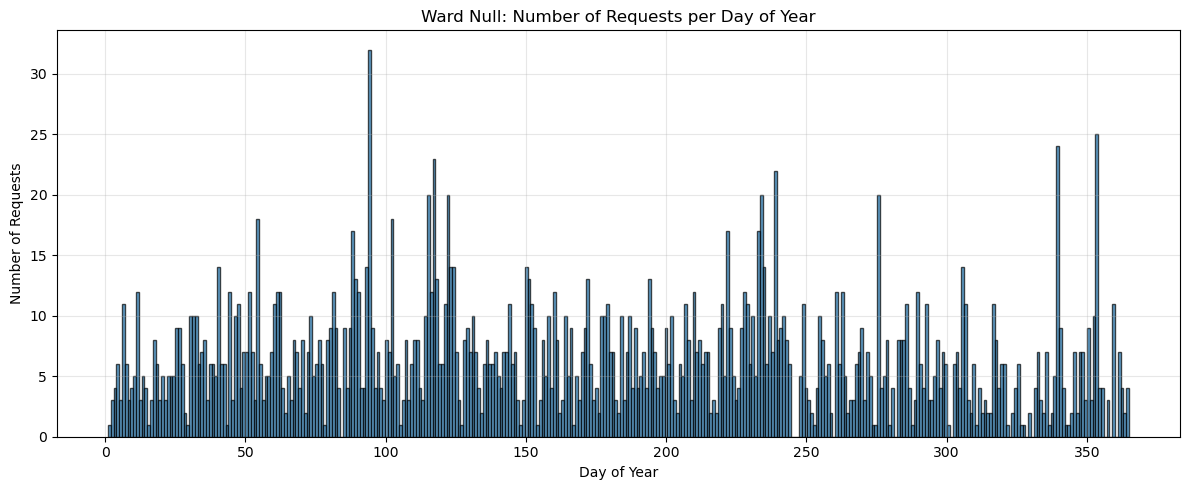

Ward Null: Total requests = 2356, Mean requests/day = 6.69


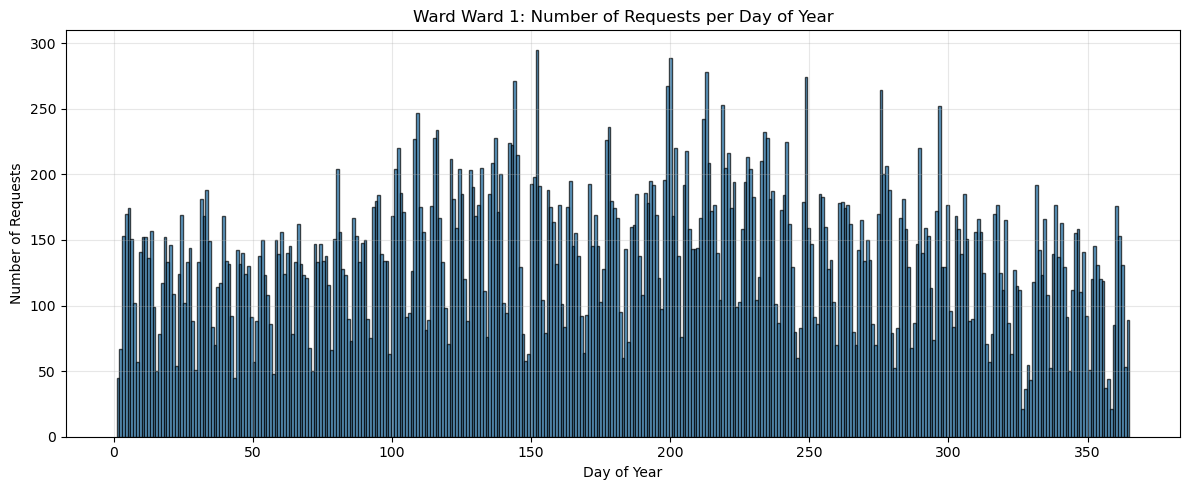

Ward Ward 1: Total requests = 51214, Mean requests/day = 140.31


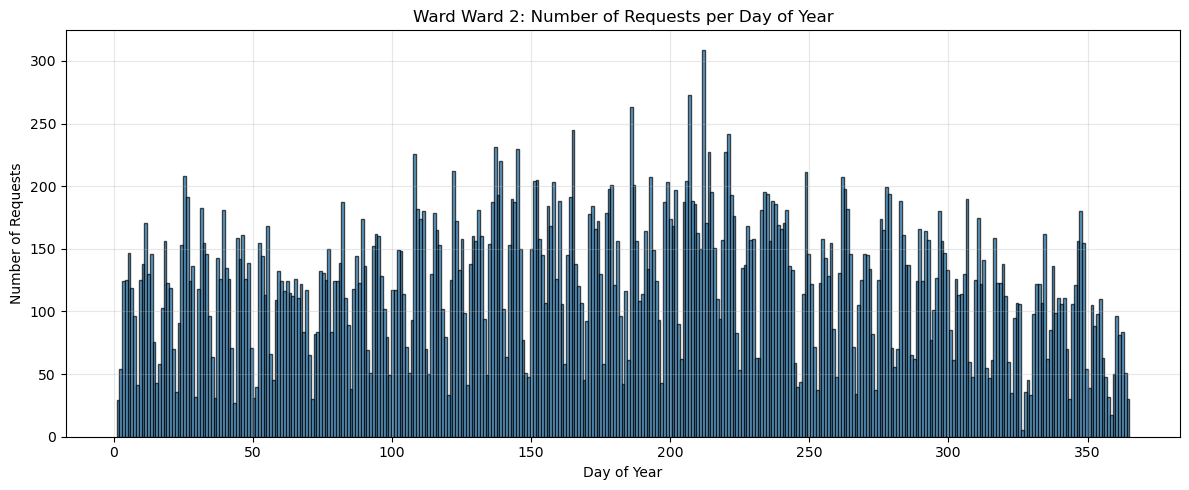

Ward Ward 2: Total requests = 45322, Mean requests/day = 124.17


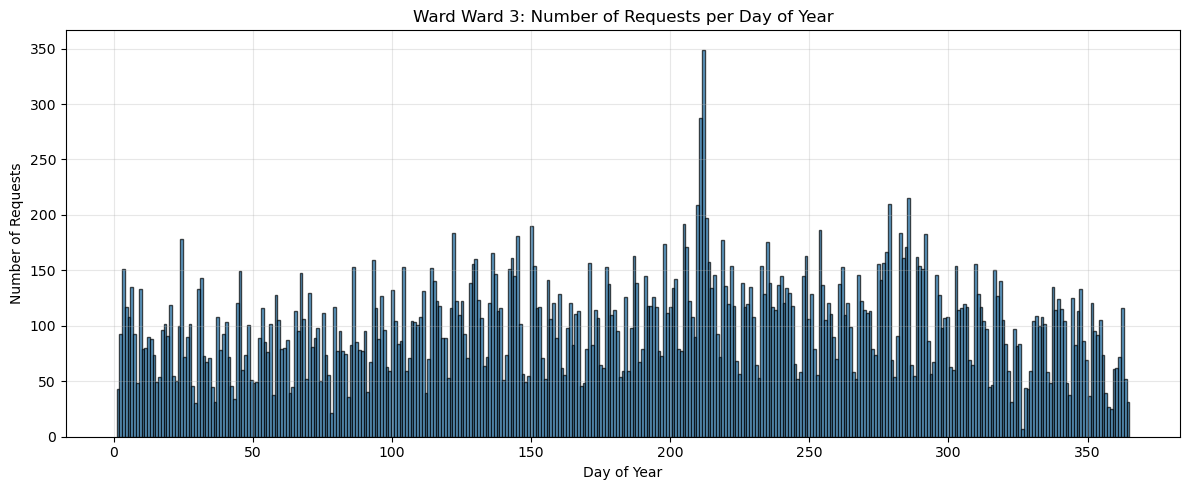

Ward Ward 3: Total requests = 37290, Mean requests/day = 102.16


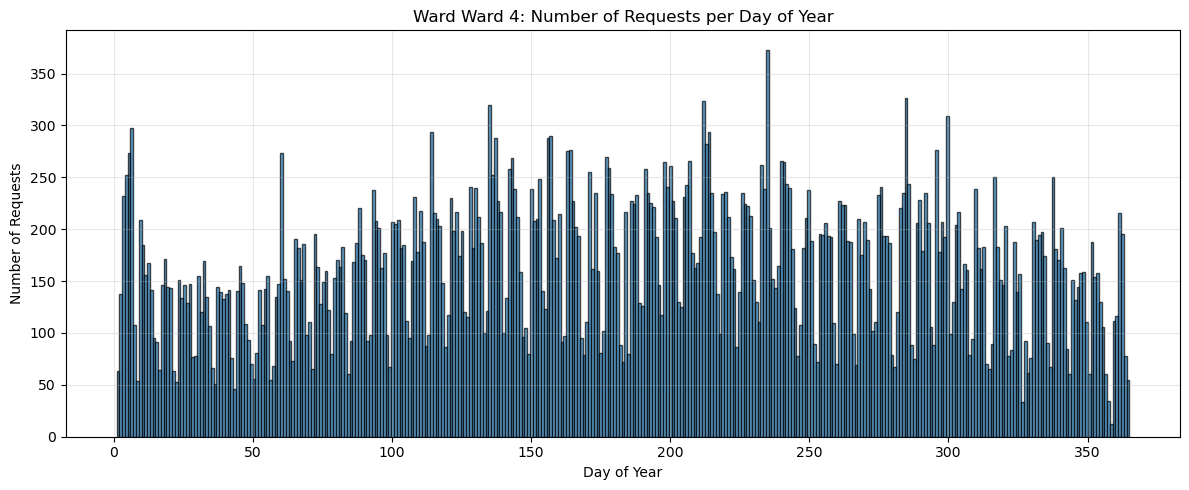

Ward Ward 4: Total requests = 59806, Mean requests/day = 163.85


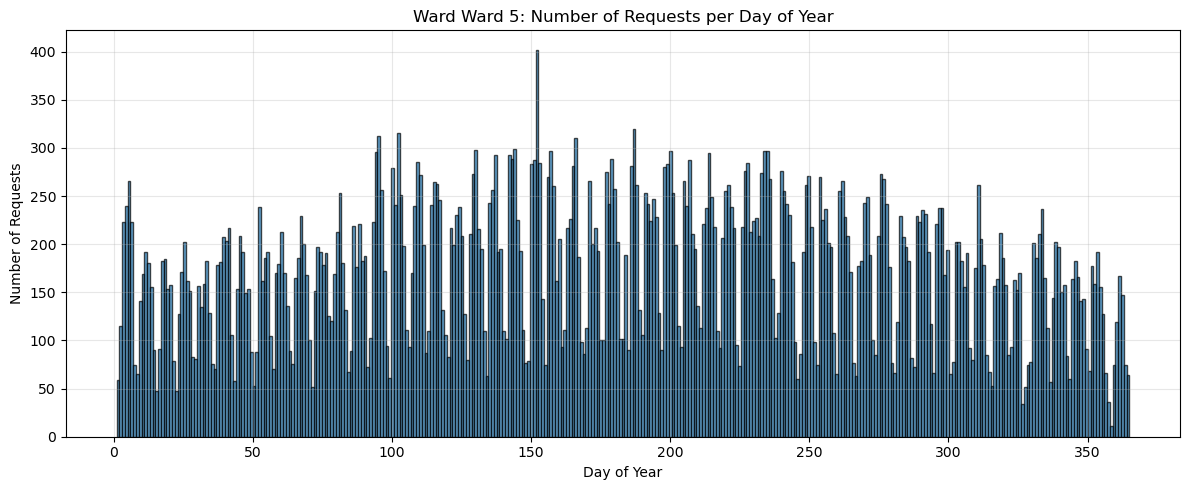

Ward Ward 5: Total requests = 63458, Mean requests/day = 173.86


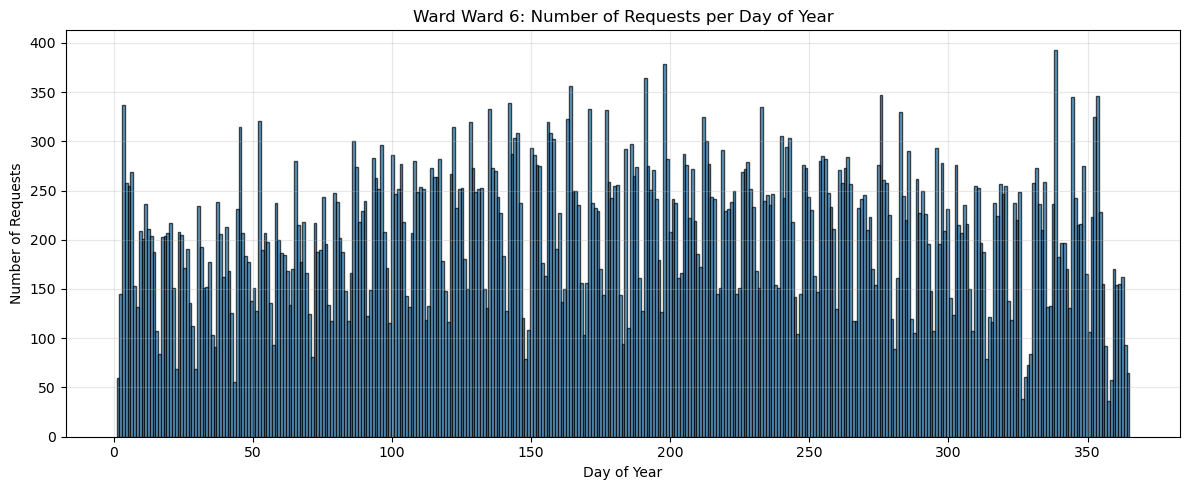

Ward Ward 6: Total requests = 76156, Mean requests/day = 208.65


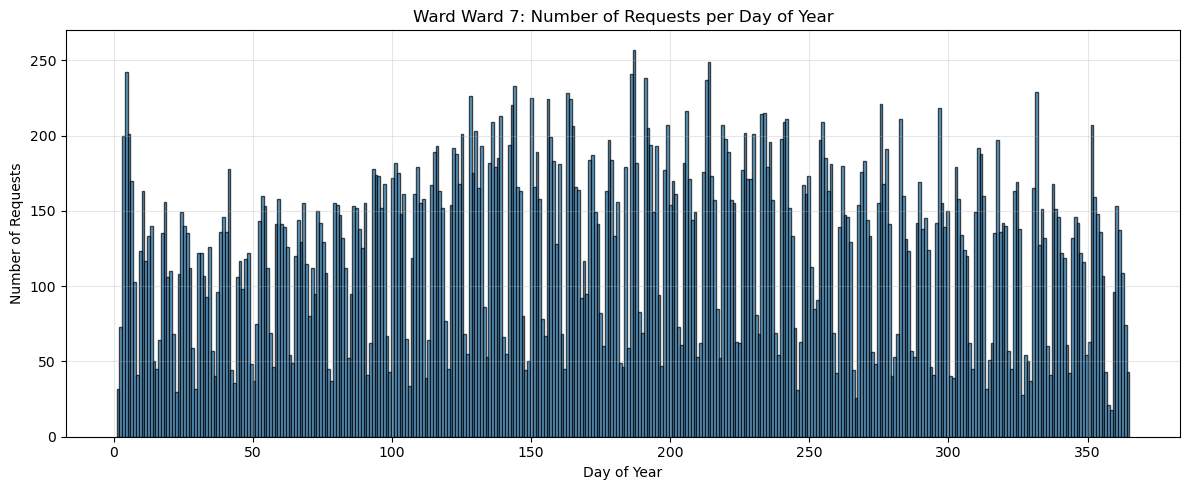

Ward Ward 7: Total requests = 46818, Mean requests/day = 128.27


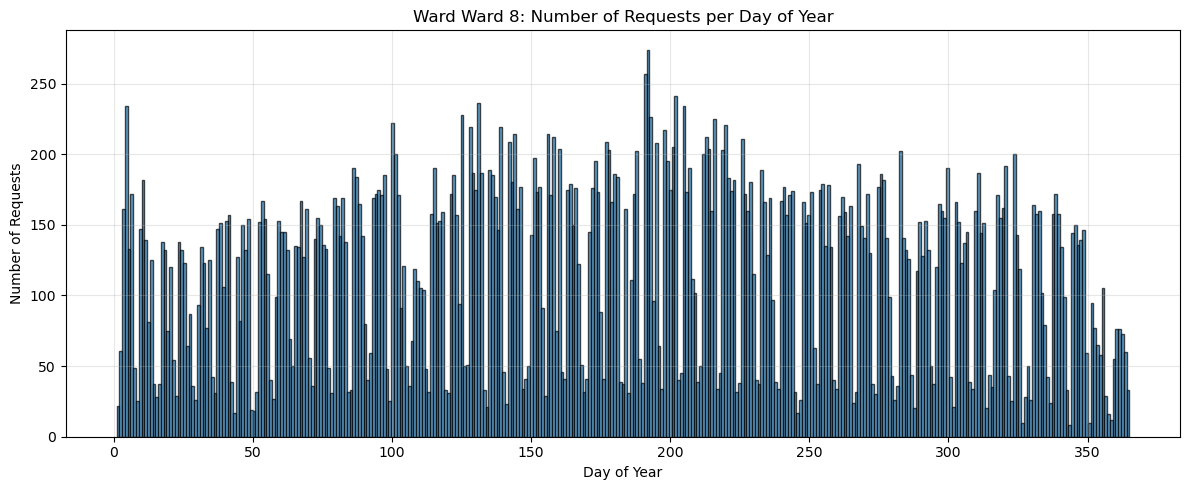

Ward Ward 8: Total requests = 42823, Mean requests/day = 117.32


In [25]:
# For each ward: histogram of requests per day of year
df_with_ward = df.dropna(subset=['WARD'])

for ward in sorted(wards_list):
    ward_data = df_with_ward[df_with_ward['WARD'] == ward]
    requests_by_day = ward_data.groupby('DAY_OF_YEAR').size()
    
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.hist(requests_by_day.index, bins=365, weights=requests_by_day.values, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('Number of Requests')
    ax.set_title(f'Ward {ward}: Number of Requests per Day of Year')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Ward {ward}: Total requests = {len(ward_data)}, Mean requests/day = {requests_by_day.mean():.2f}")

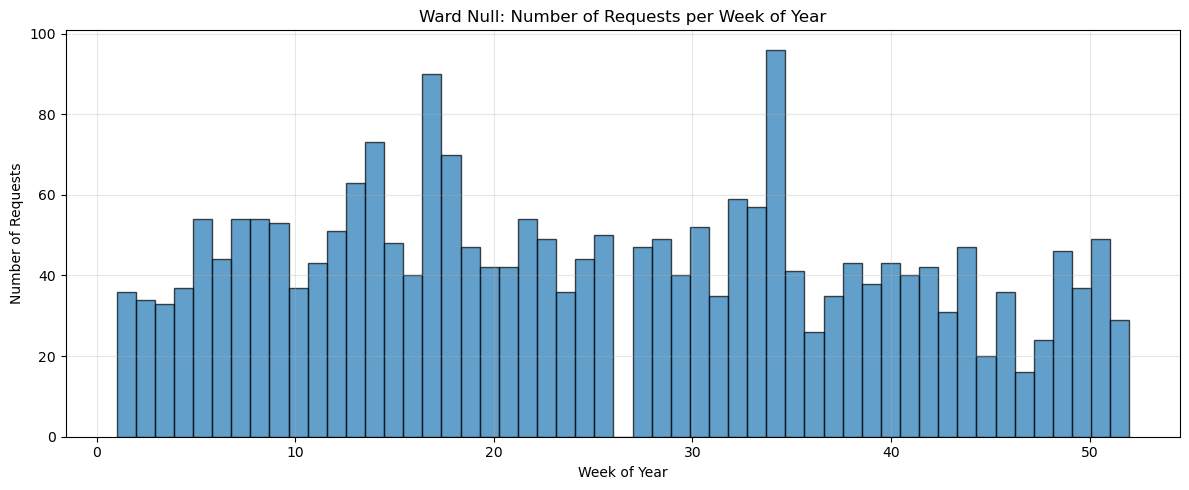

Ward Null: Mean requests/week = 45.31


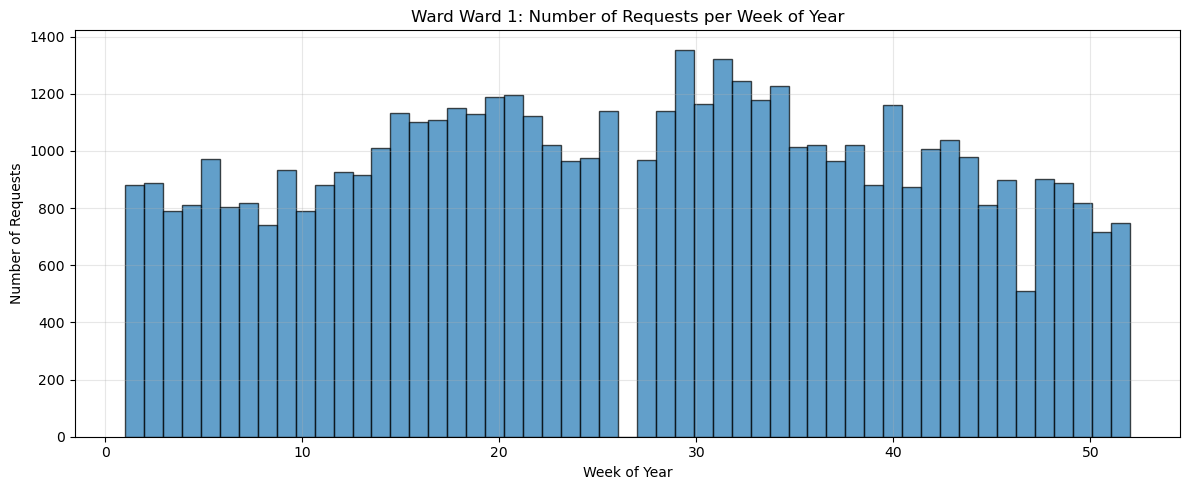

Ward Ward 1: Mean requests/week = 984.88


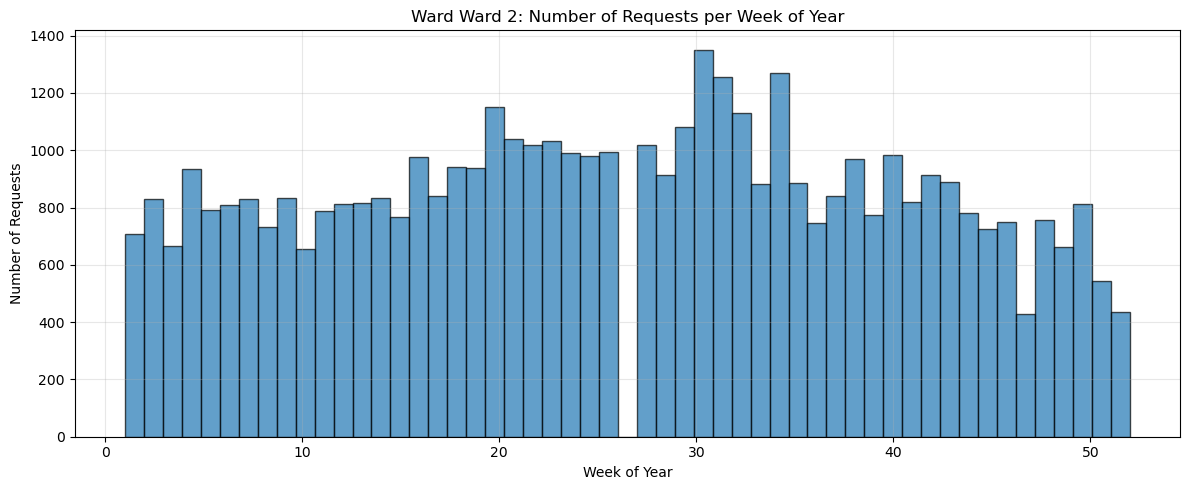

Ward Ward 2: Mean requests/week = 871.58


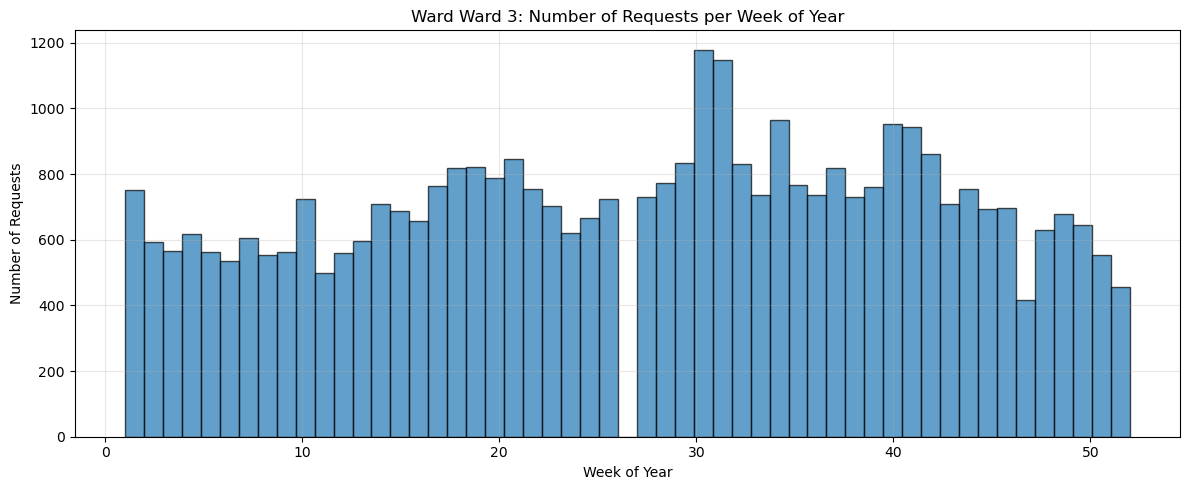

Ward Ward 3: Mean requests/week = 717.12


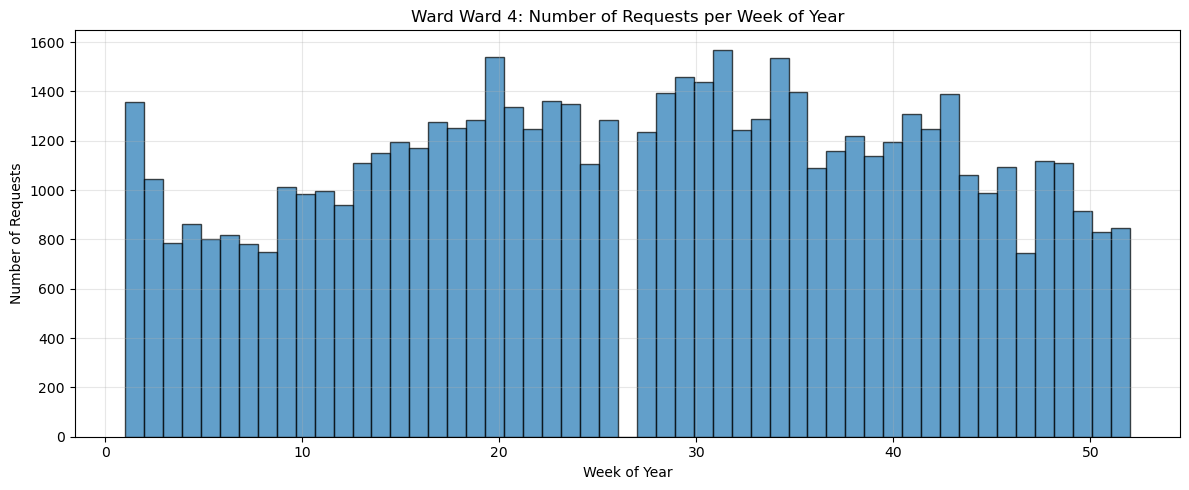

Ward Ward 4: Mean requests/week = 1150.12


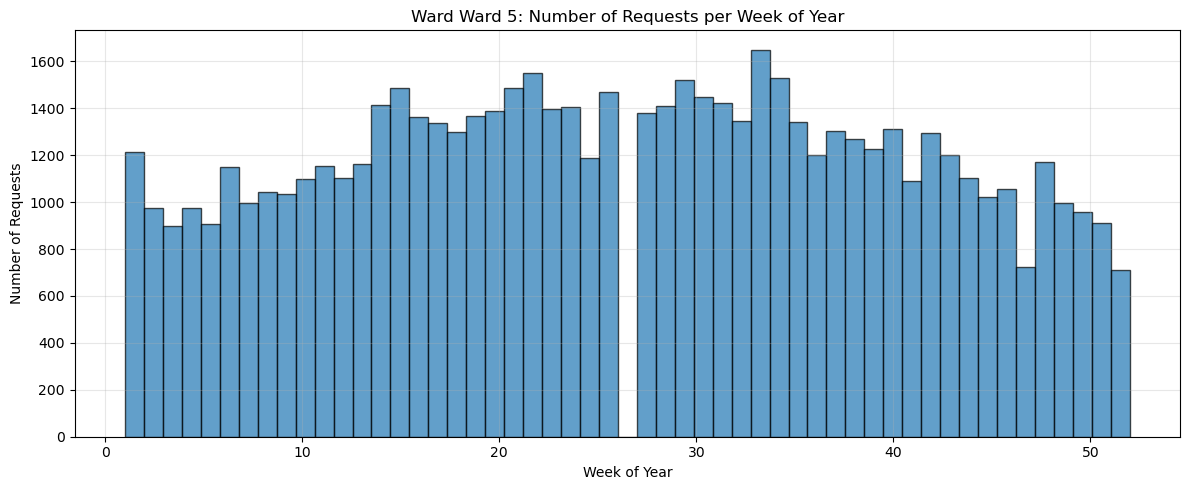

Ward Ward 5: Mean requests/week = 1220.35


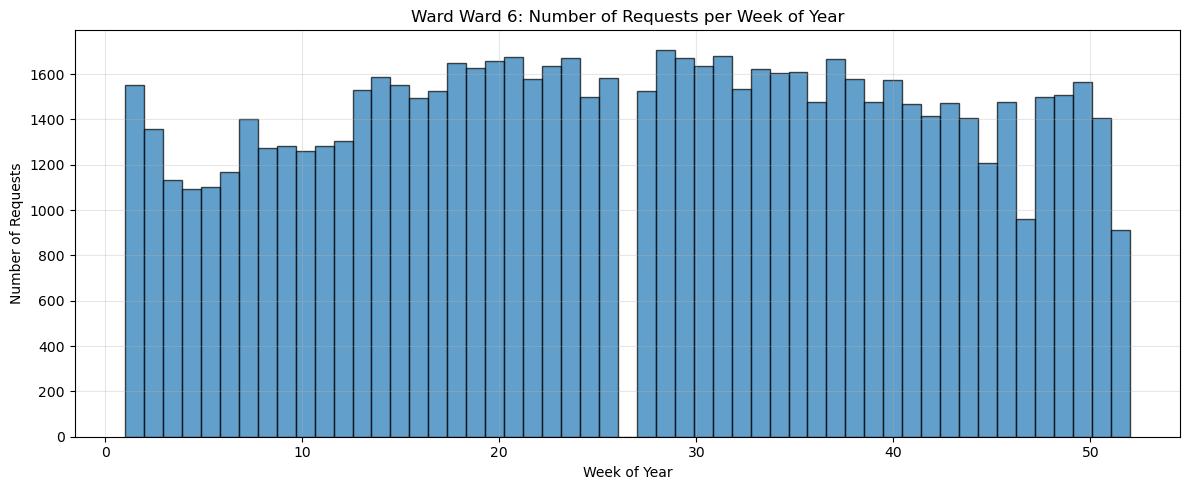

Ward Ward 6: Mean requests/week = 1464.54


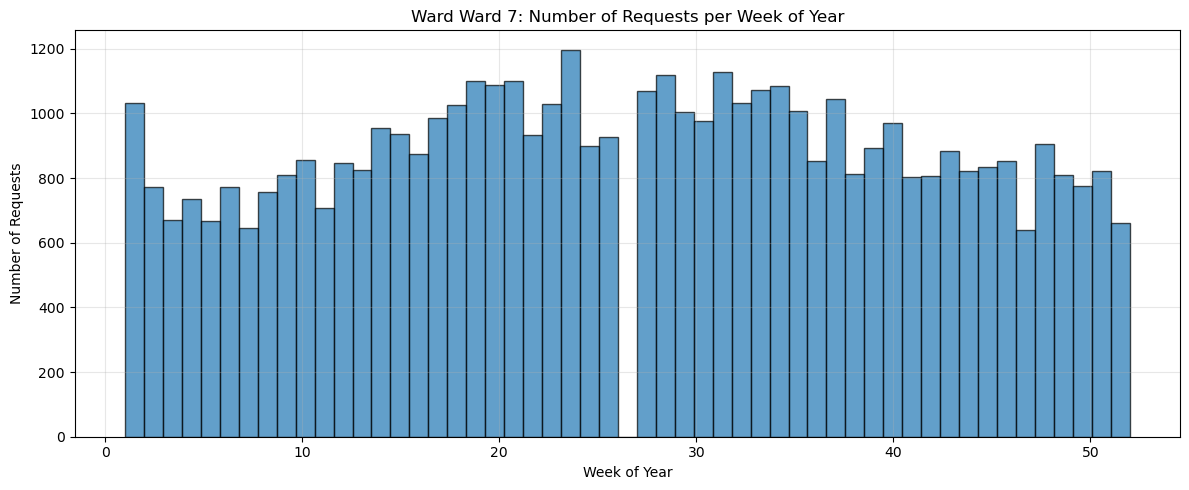

Ward Ward 7: Mean requests/week = 900.35


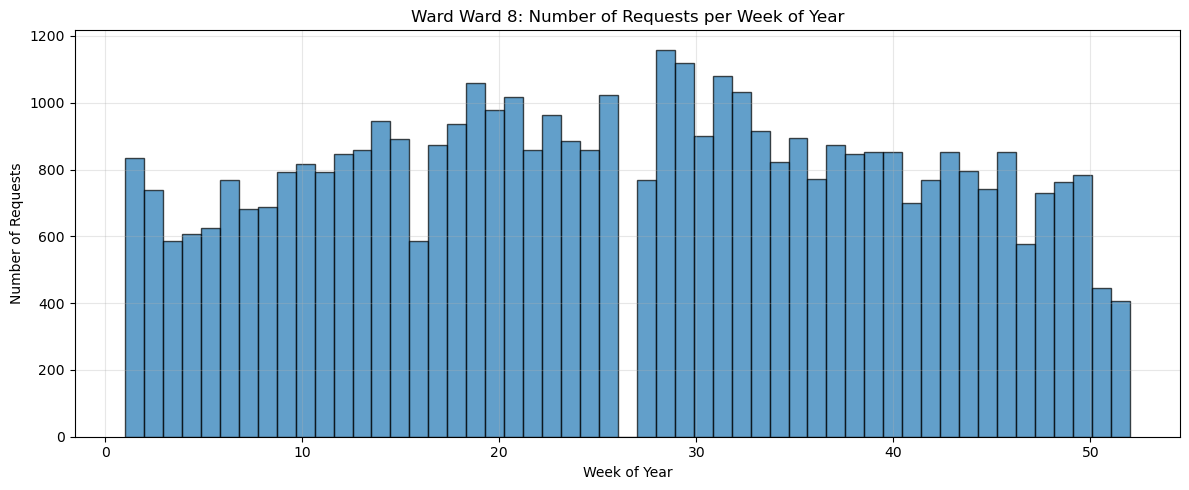

Ward Ward 8: Mean requests/week = 823.52


In [26]:
# For each ward: histogram of requests per week of year
for ward in sorted(wards_list):
    ward_data = df_with_ward[df_with_ward['WARD'] == ward]
    requests_by_week = ward_data.groupby('WEEK').size()
    
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.hist(requests_by_week.index, bins=53, weights=requests_by_week.values, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Week of Year')
    ax.set_ylabel('Number of Requests')
    ax.set_title(f'Ward {ward}: Number of Requests per Week of Year')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Ward {ward}: Mean requests/week = {requests_by_week.mean():.2f}")

## For every ward: top 50 services

In [27]:
# For each ward: top 50 services by request count
for ward in sorted(wards_list):
    ward_data = df_with_ward[df_with_ward['WARD'] == ward]
    top_services = ward_data.groupby('SERVICECODEDESCRIPTION').size().sort_values(ascending=False).head(50)
    
    print(f"\n{'='*80}")
    print(f"WARD {ward}: Top 50 Services")
    print(f"{'='*80}")
    print(top_services.to_string())
    print(f"\nTotal services in Ward {ward}: {ward_data['SERVICECODEDESCRIPTION'].nunique()}")


WARD Null: Top 50 Services
SERVICECODEDESCRIPTION
Traffic Signal Issue                                    421
Parking Enforcement                                     218
Roadway Signs                                           209
Graffiti Removal                                        206
Streetlight Repair Investigation                        120
Sanitation Enforcement                                  120
Illegal Poster                                          114
Parking Meter Repair                                    109
Illegal Dumping                                          87
Traffic Safety Input                                     74
Public Space Litter Can-Collection                       69
Pothole                                                  67
Tree Inspection                                          46
DC How Am I Driving?                                     40
Roadway Striping / Markings                              40
Dead Animal Collection                           

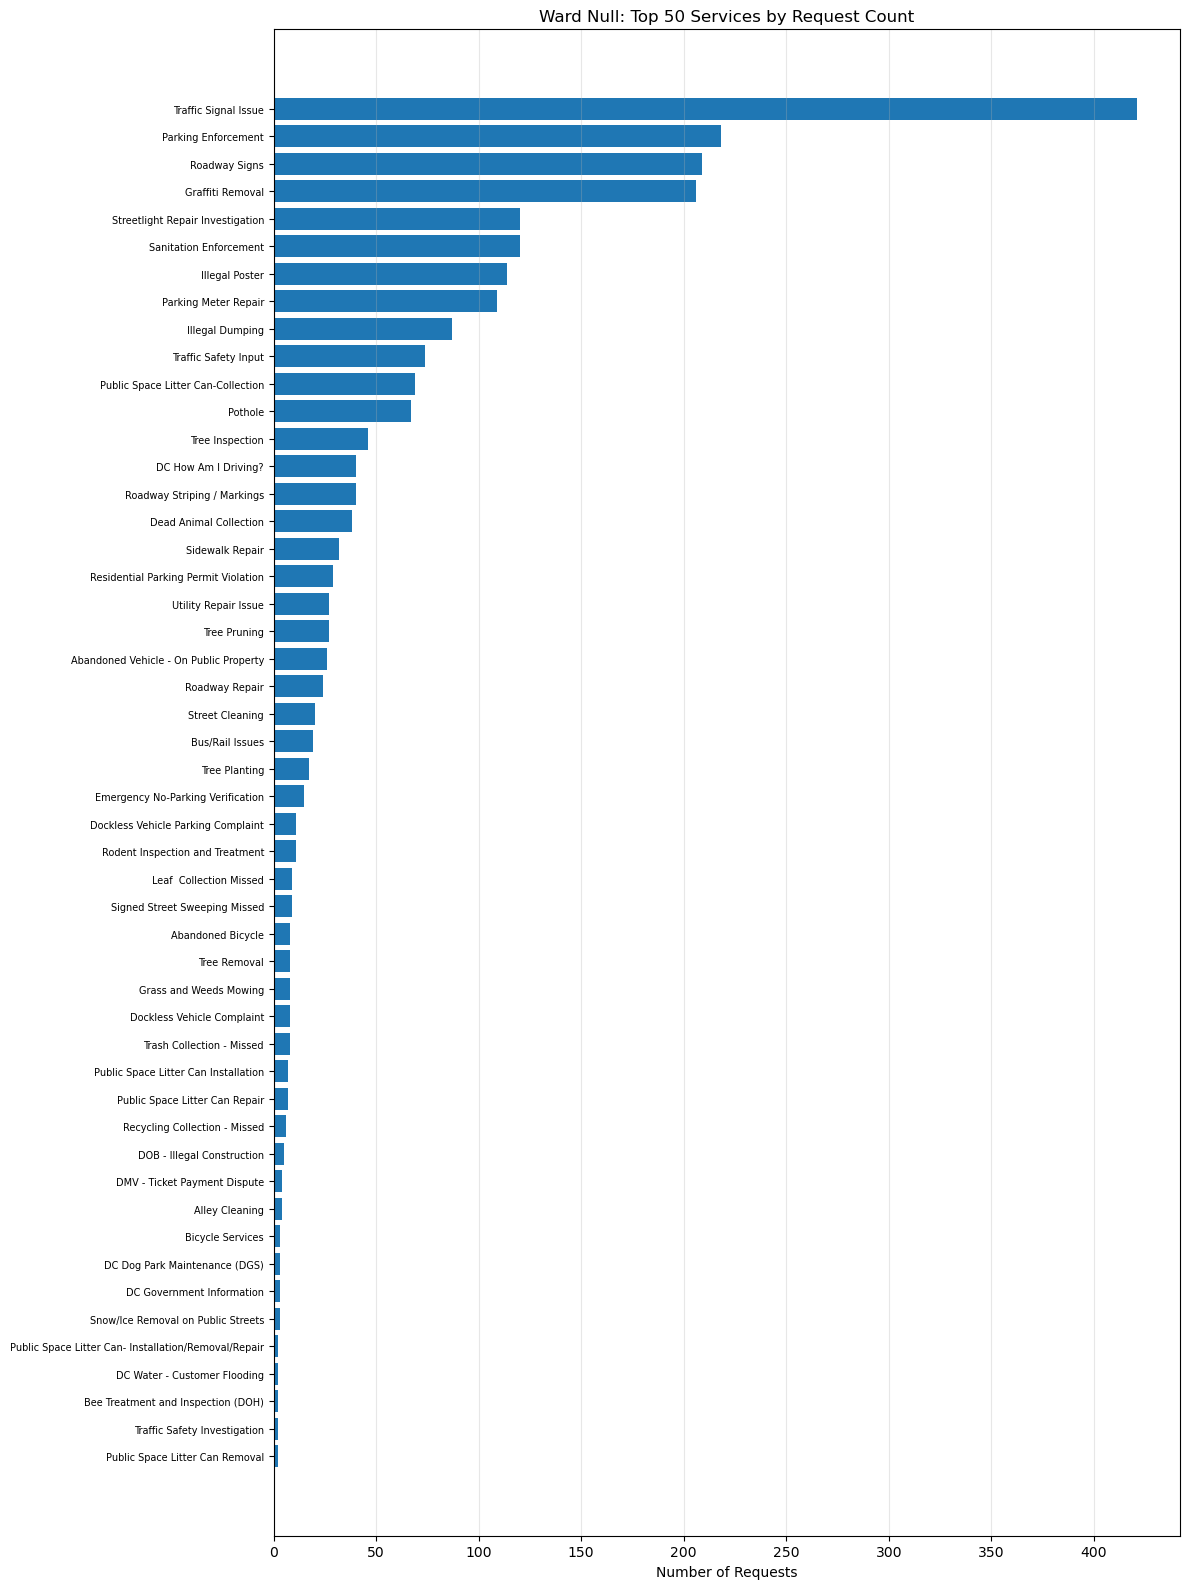

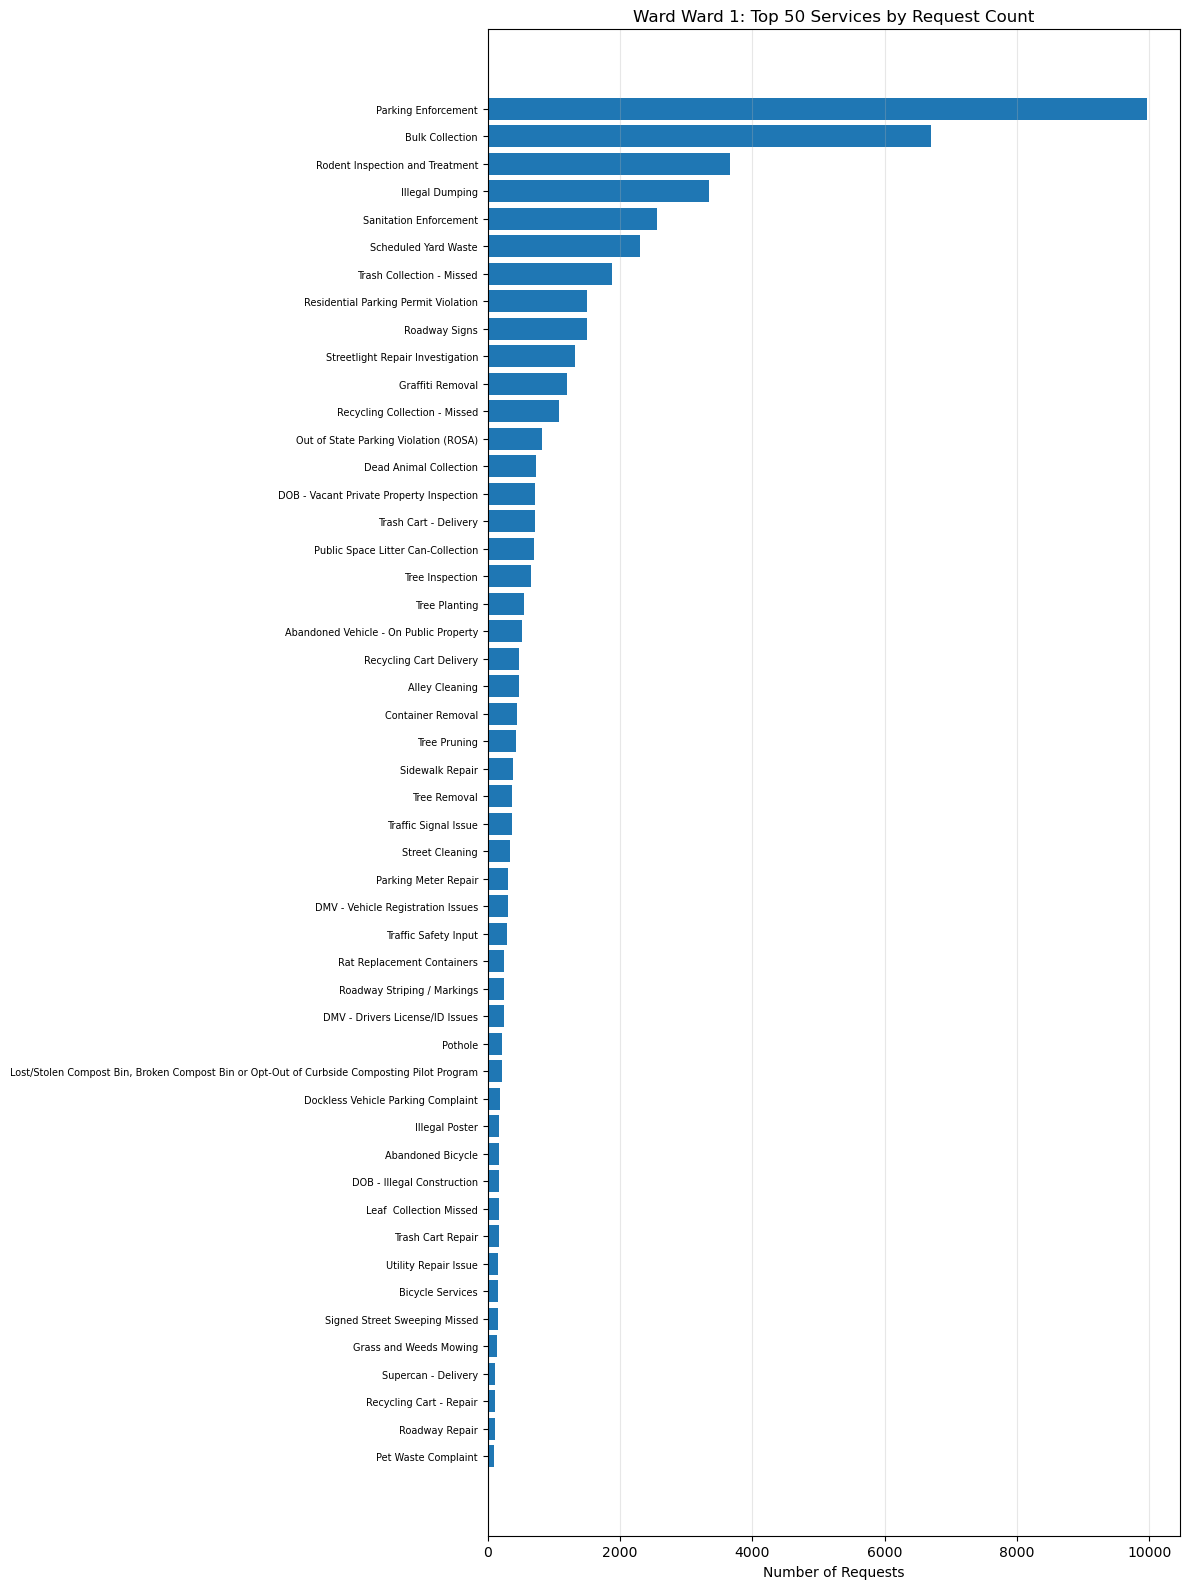

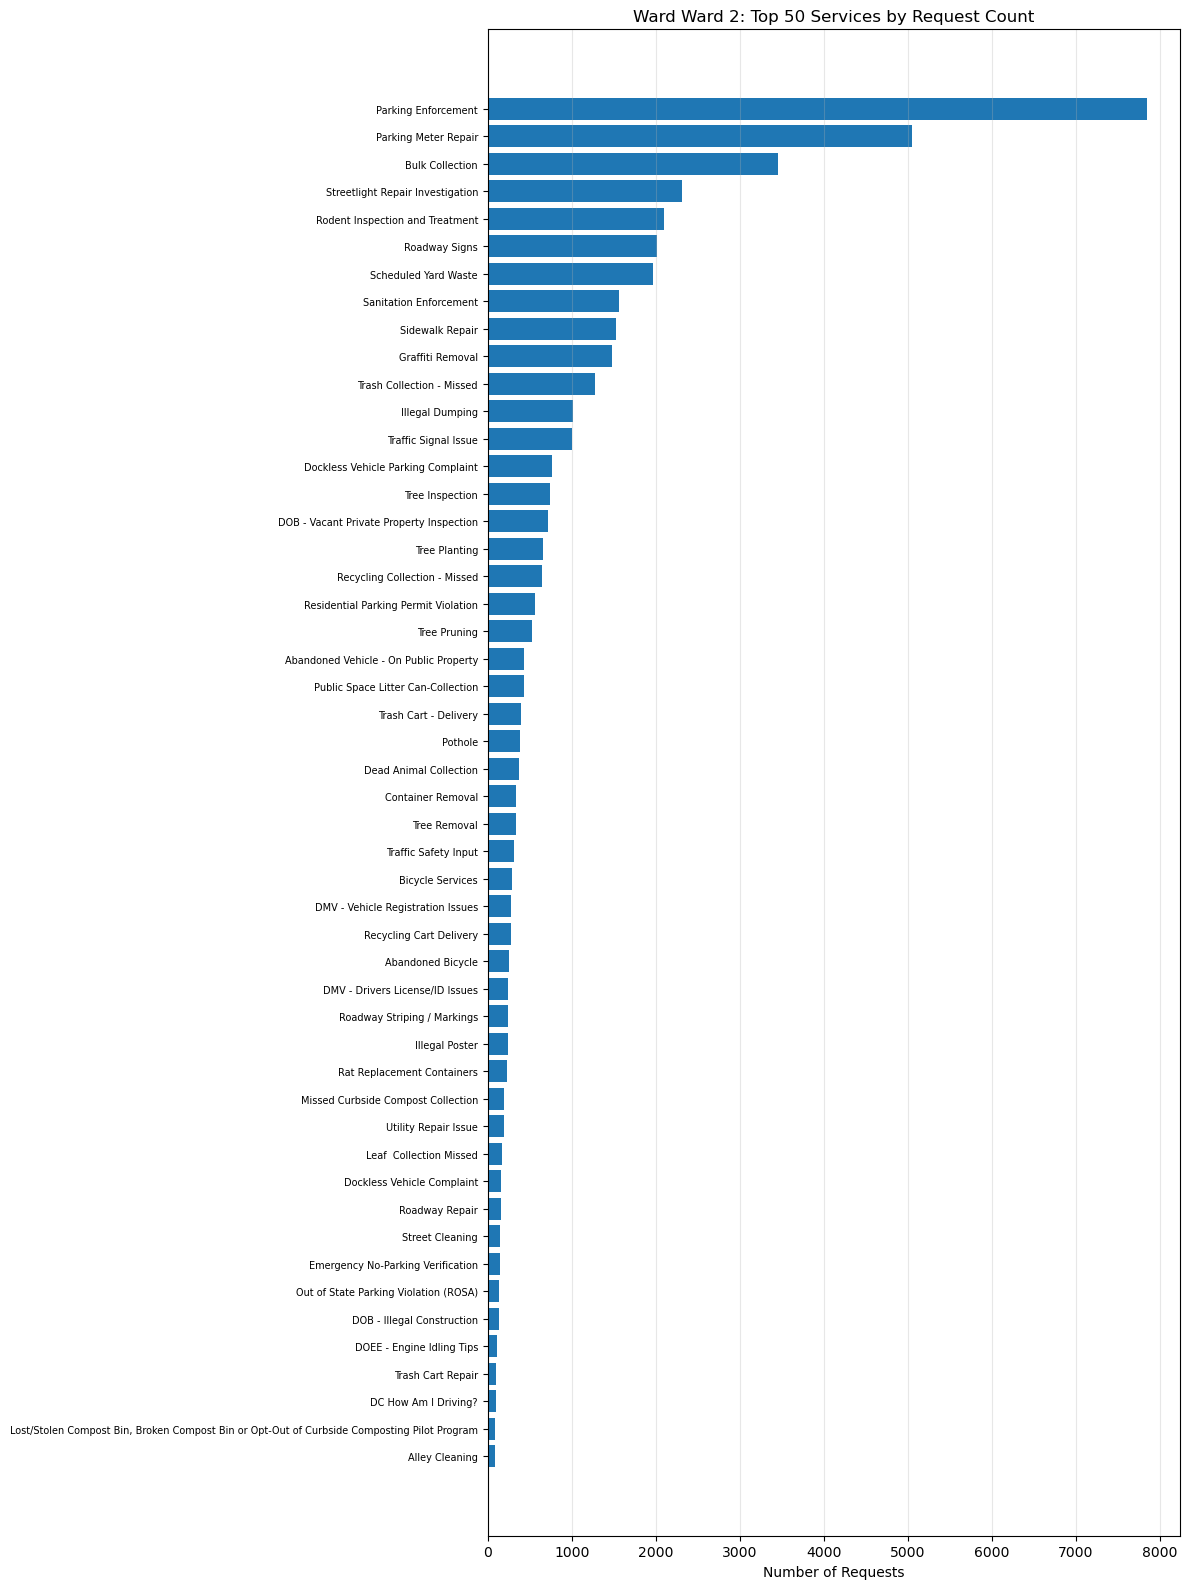

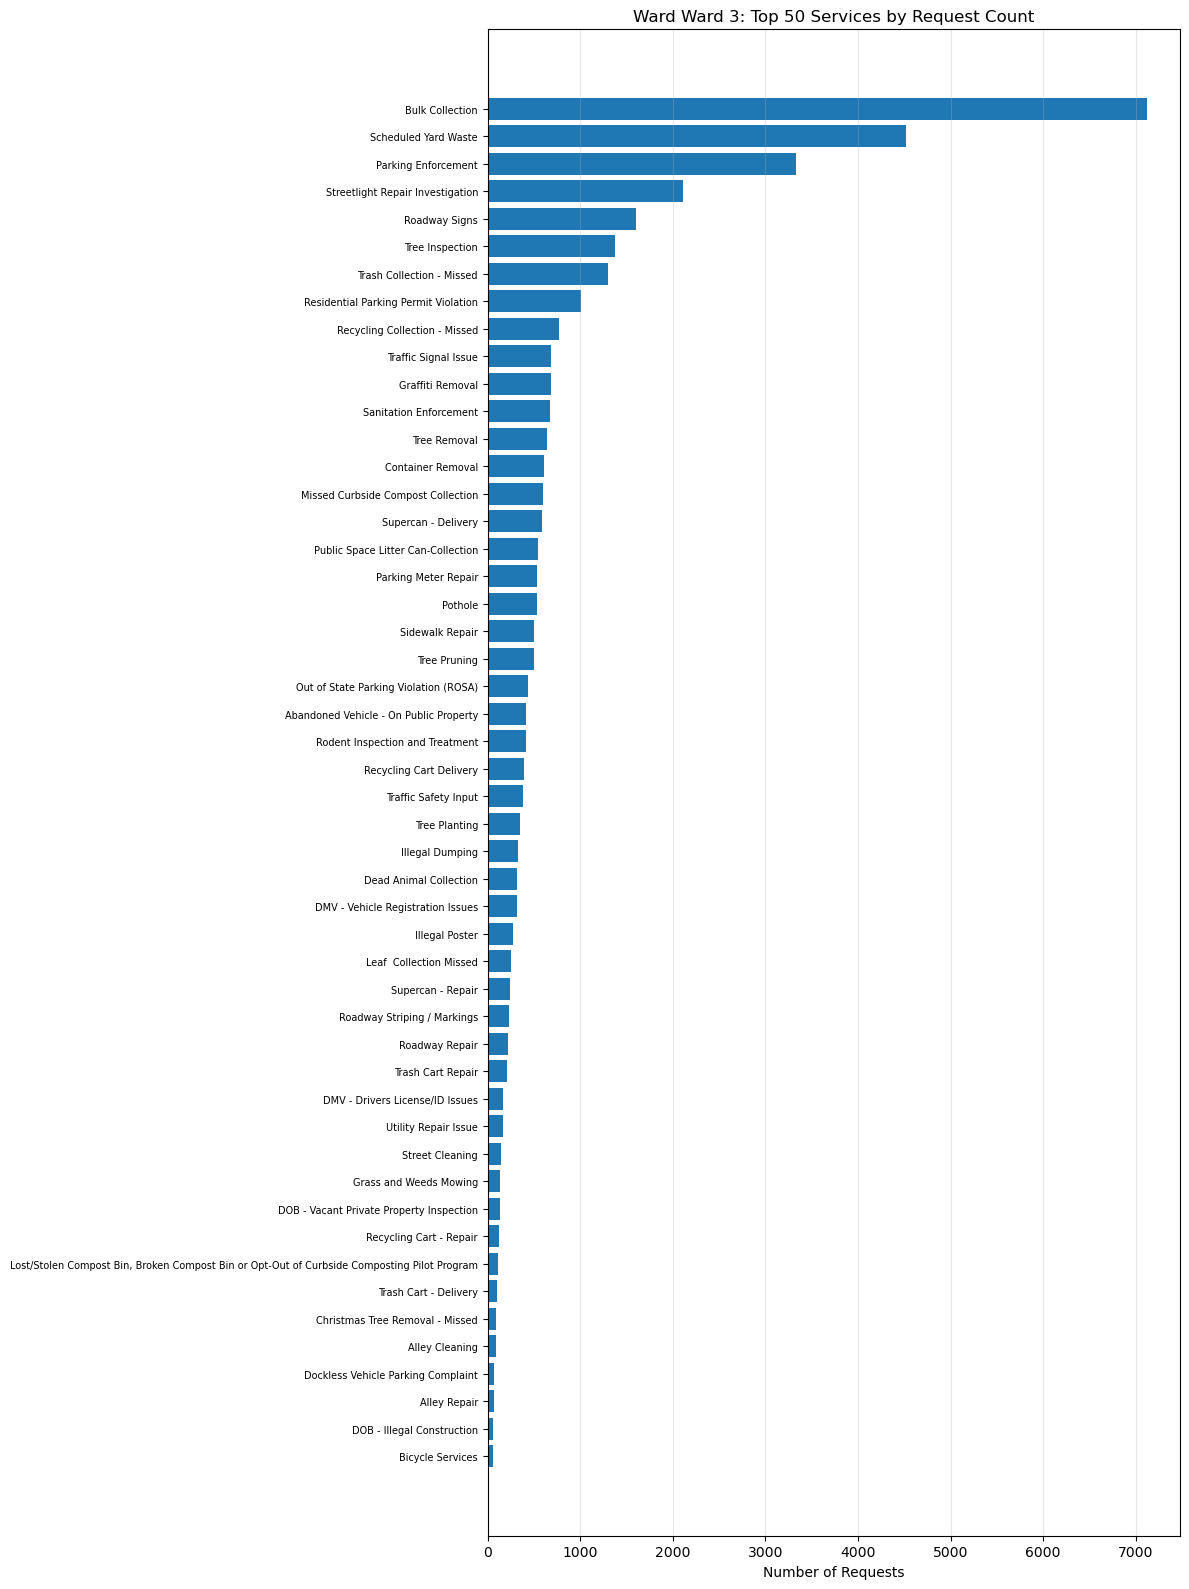

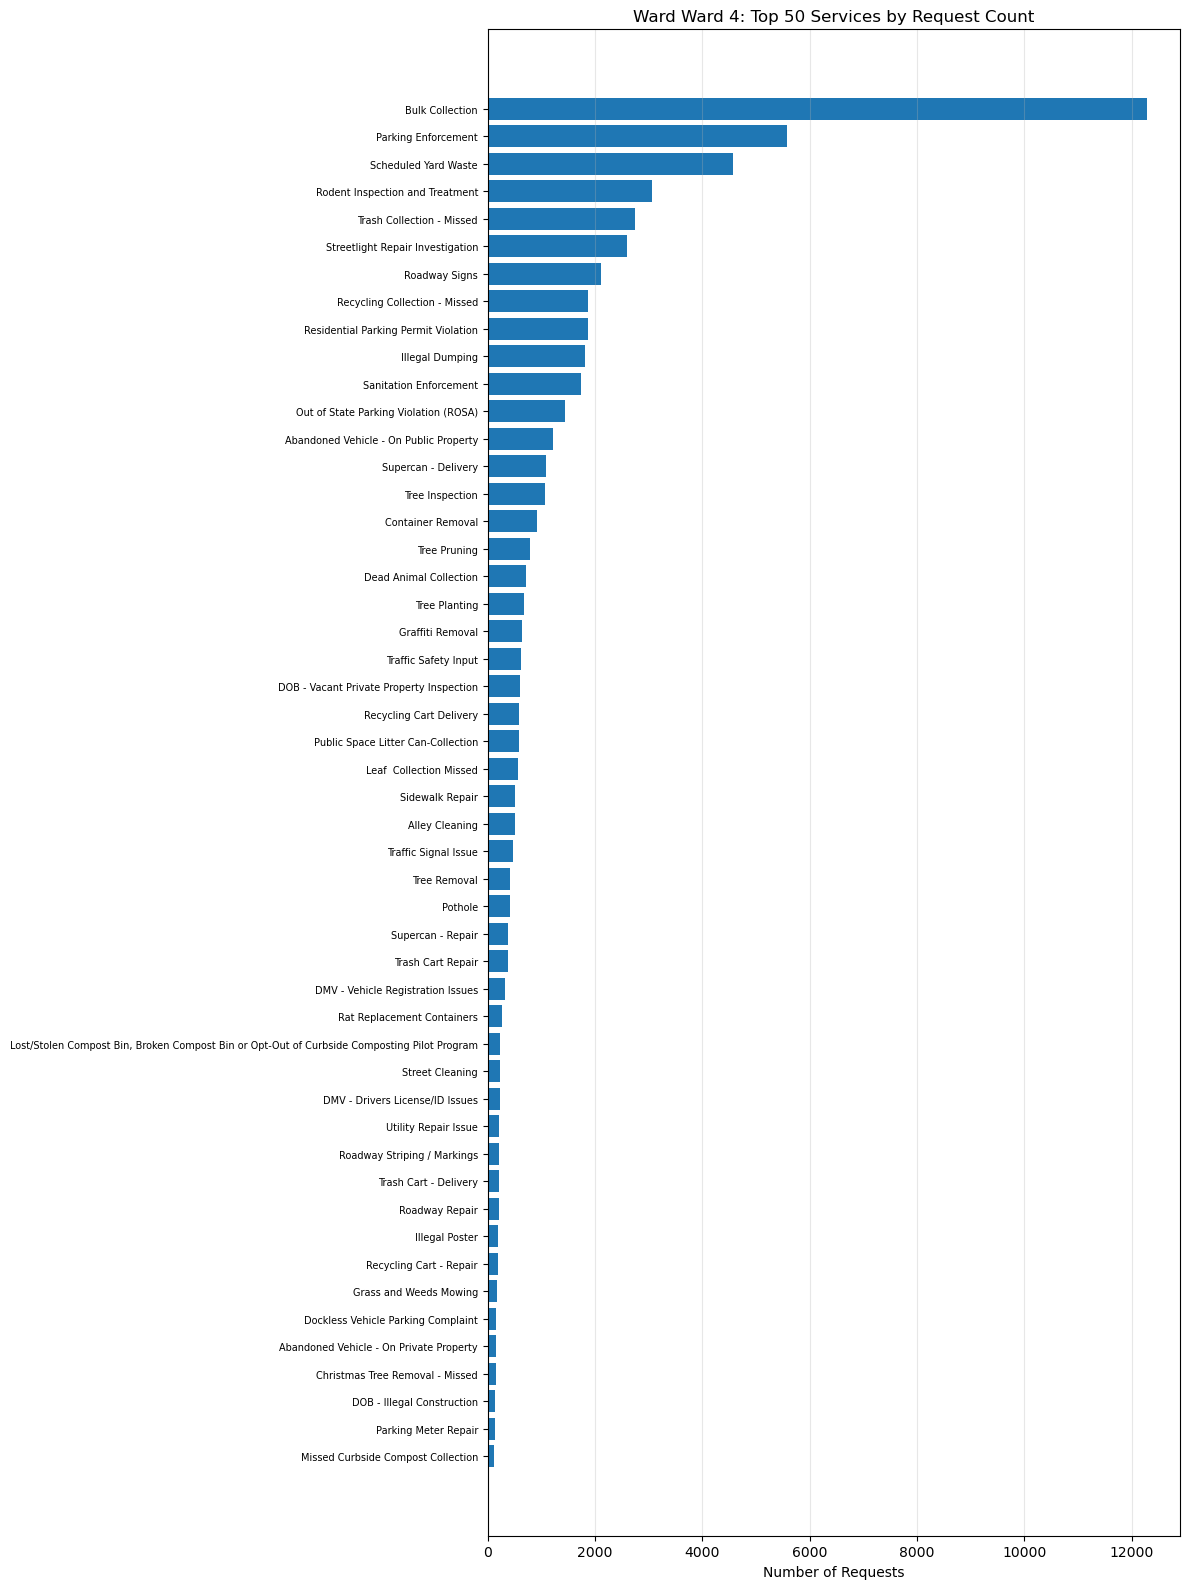

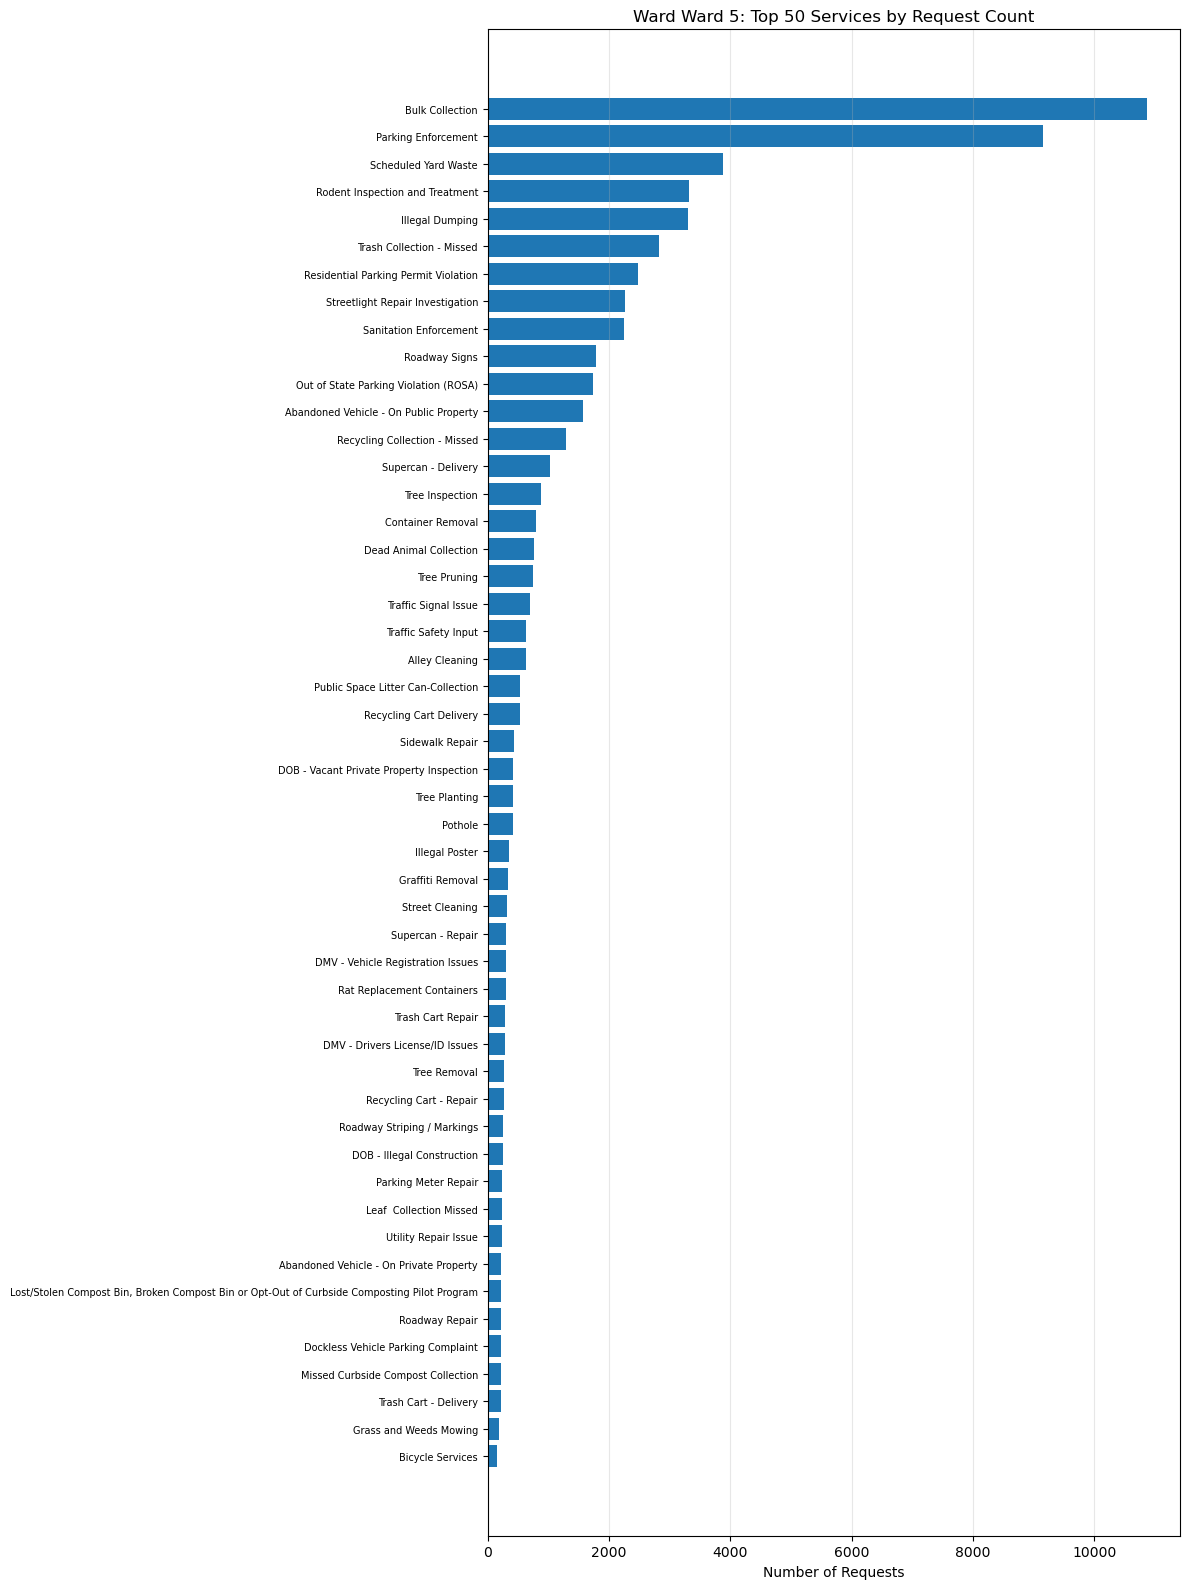

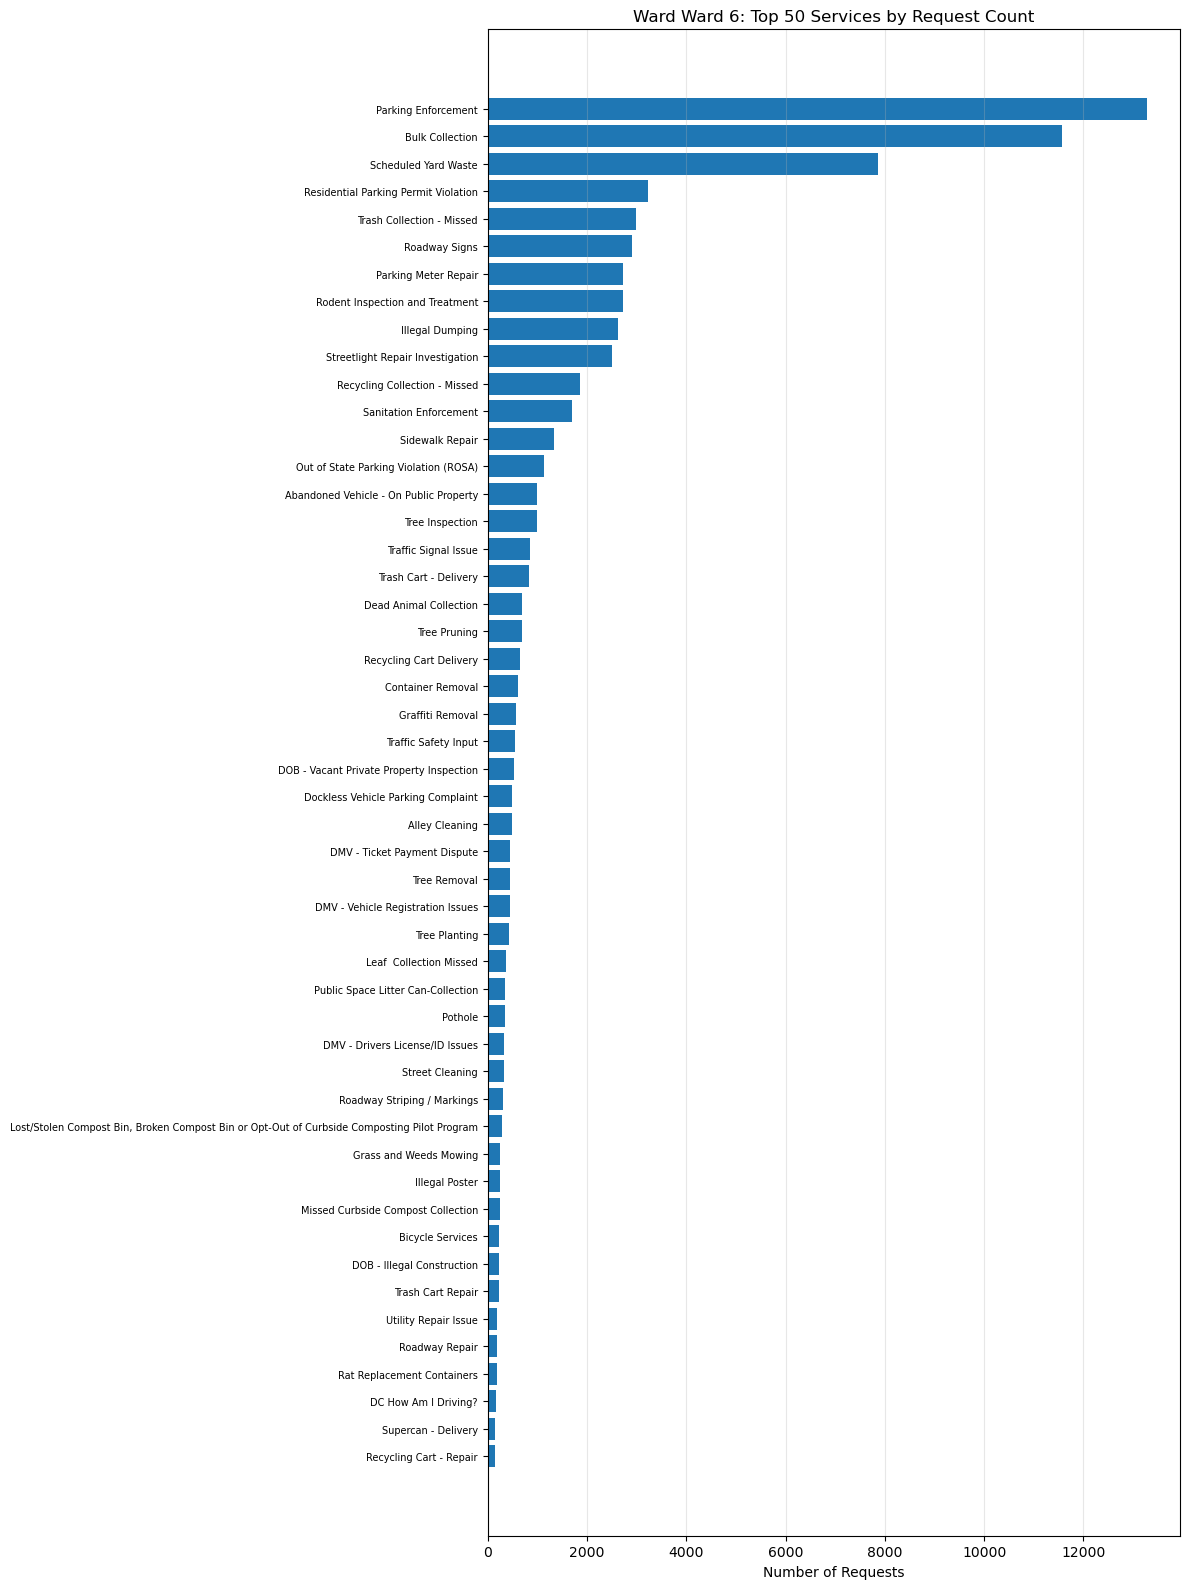

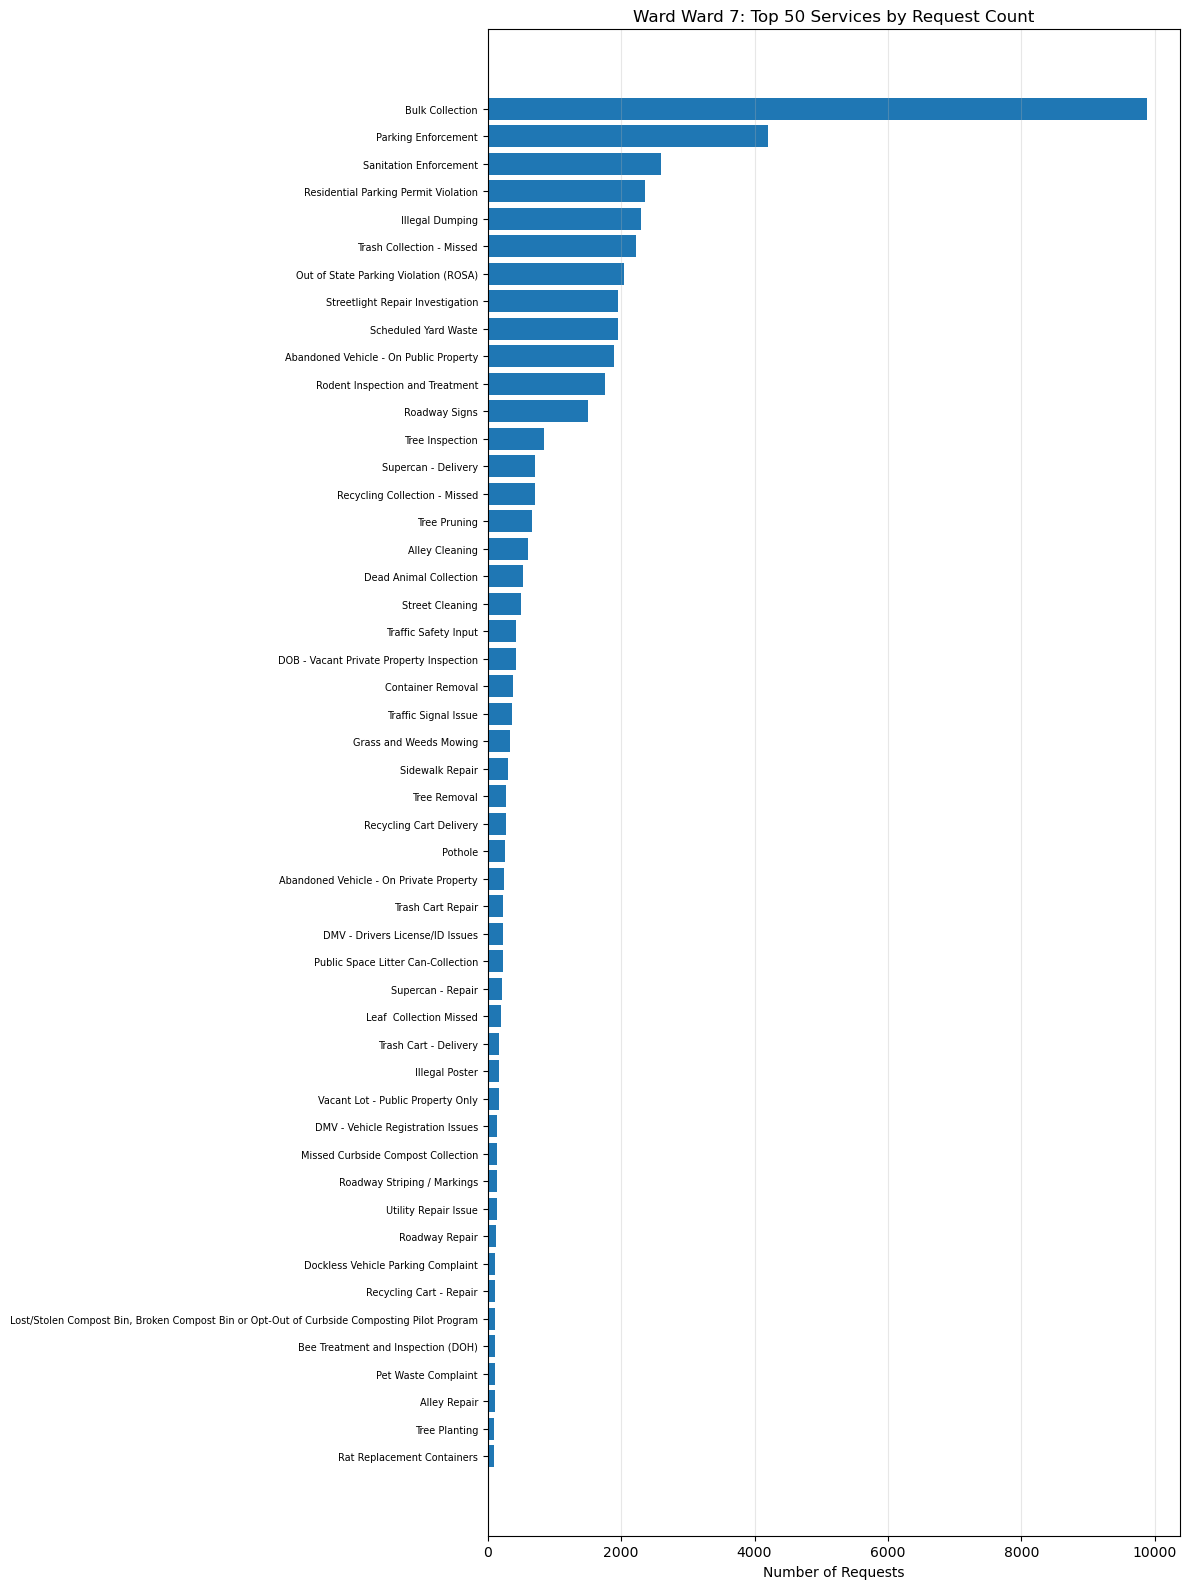

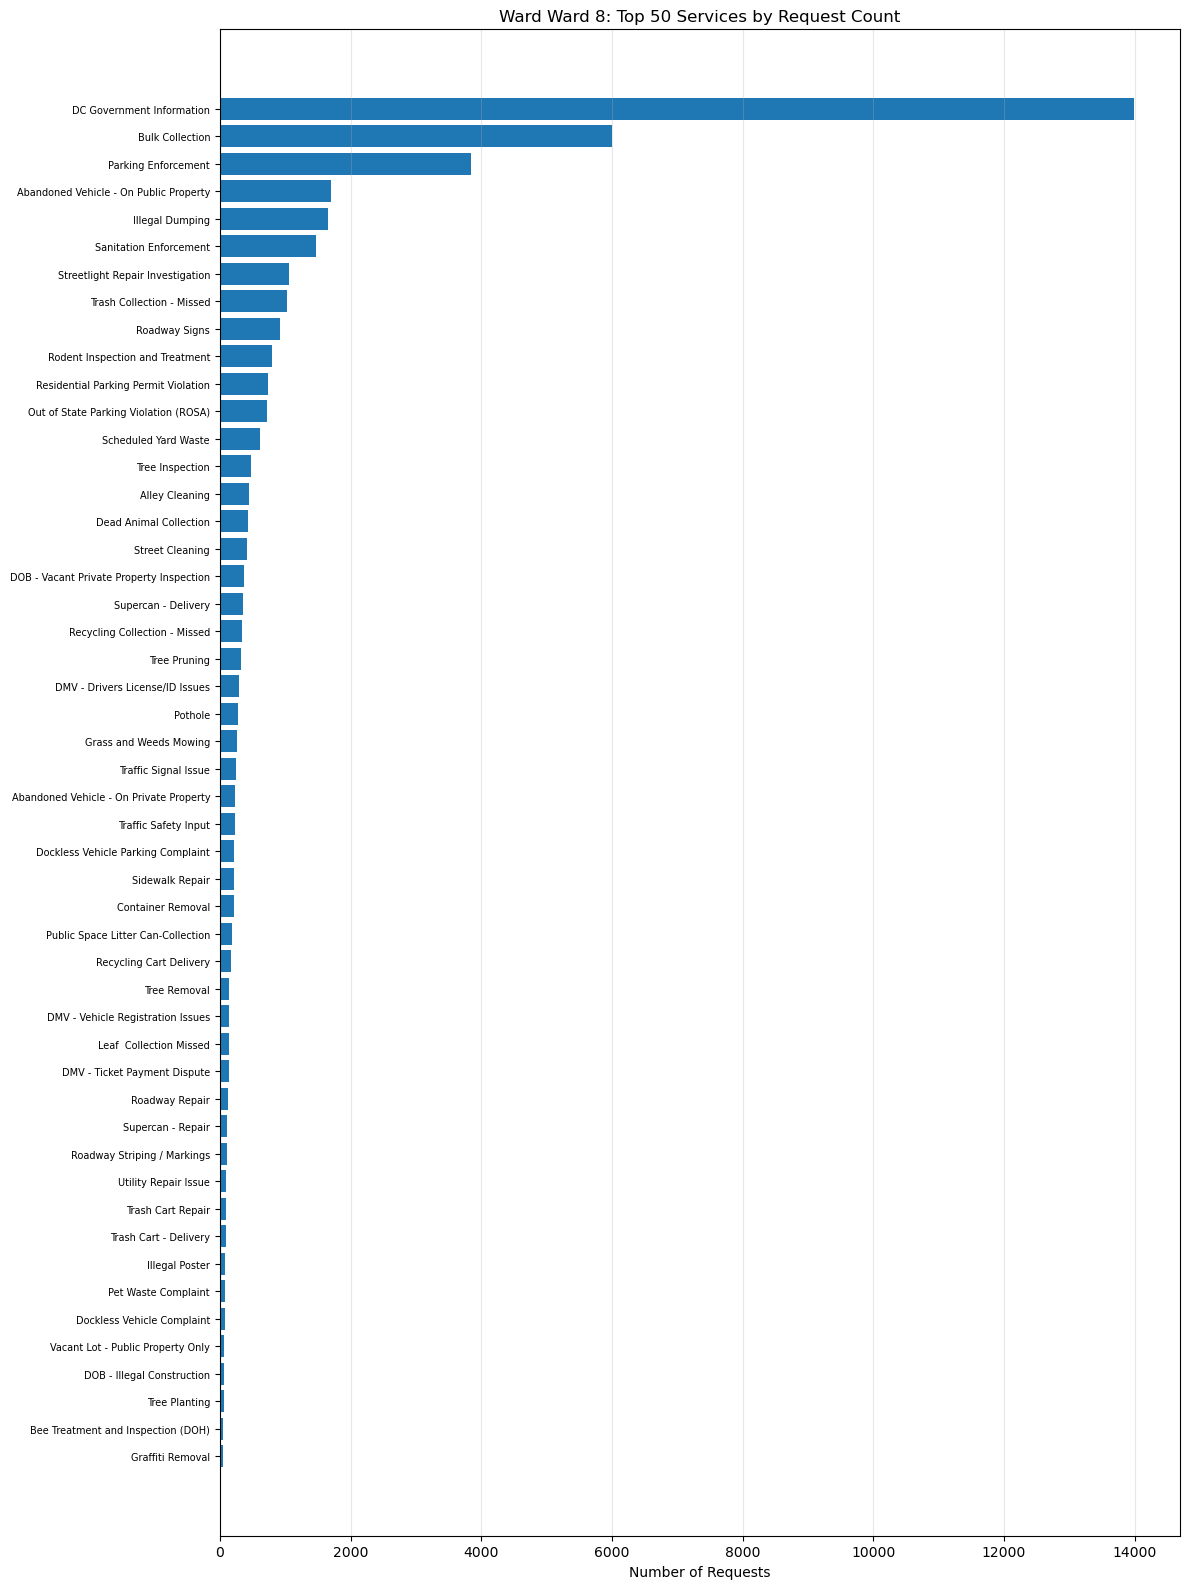

In [28]:
# Alternative: Display top 50 services for each ward as horizontal bar charts
for ward in sorted(wards_list):
    ward_data = df_with_ward[df_with_ward['WARD'] == ward]
    top_services = ward_data.groupby('SERVICECODEDESCRIPTION').size().sort_values(ascending=False).head(50)
    
    fig, ax = plt.subplots(figsize=(12, 16))
    bars = ax.barh(range(len(top_services)), top_services.values)
    ax.set_yticks(range(len(top_services)))
    ax.set_yticklabels(top_services.index, fontsize=7)
    ax.invert_yaxis()
    ax.set_xlabel('Number of Requests')
    ax.set_title(f'Ward {ward}: Top 50 Services by Request Count')
    ax.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

## Pothole Requests Analysis - Day of Week & Day of Year

In [29]:
# First, let's find what pothole-related services exist in the data
pothole_services = df[df['SERVICECODEDESCRIPTION'].str.contains('pothole', case=False, na=False)]['SERVICECODEDESCRIPTION'].unique()
print("Pothole-related services found:")
for service in pothole_services:
    count = len(df[df['SERVICECODEDESCRIPTION'] == service])
    print(f"  - {service}: {count} requests")

Pothole-related services found:
  - Pothole: 2891 requests


In [30]:
# Filter for pothole requests and add day of week
df_potholes = df[df['SERVICECODEDESCRIPTION'].str.contains('pothole', case=False, na=False)].copy()
df_potholes['DAY_OF_WEEK'] = df_potholes['ADDDATE'].dt.dayofweek  # Monday=0, Sunday=6
df_potholes['DAY_NAME'] = df_potholes['ADDDATE'].dt.day_name()

print(f"Total pothole requests: {len(df_potholes)}")

Total pothole requests: 2891


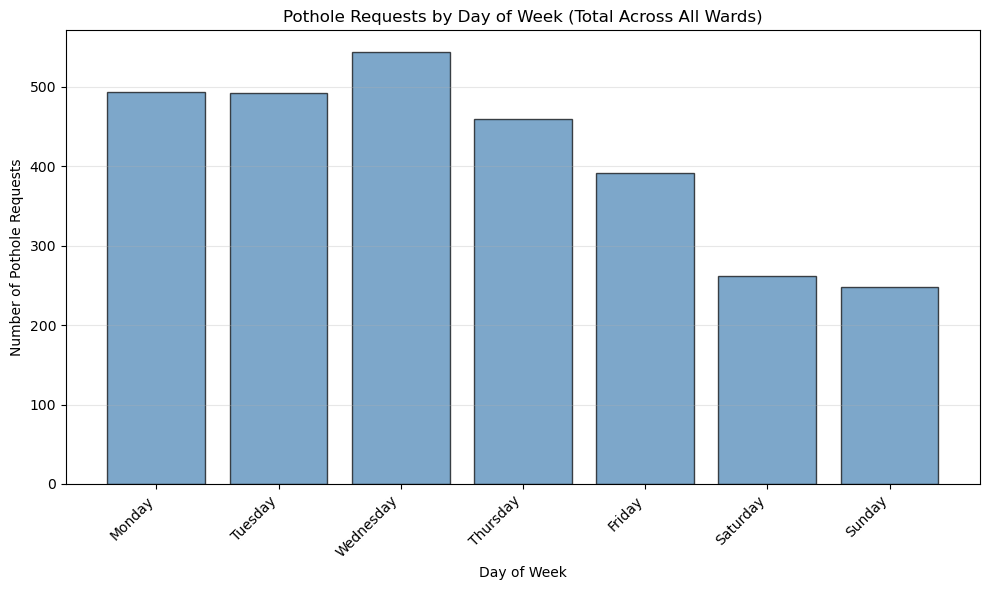


Pothole requests by day of week:
  Monday: 494 requests
  Tuesday: 492 requests
  Wednesday: 544 requests
  Thursday: 460 requests
  Friday: 391 requests
  Saturday: 262 requests
  Sunday: 248 requests


In [31]:
# Plot pothole requests by day of week
requests_by_dow = df_potholes.groupby('DAY_OF_WEEK').size()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(7), [requests_by_dow.get(i, 0) for i in range(7)], color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xticks(range(7))
ax.set_xticklabels(day_names, rotation=45, ha='right')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Pothole Requests')
ax.set_title('Pothole Requests by Day of Week (Total Across All Wards)')
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPothole requests by day of week:")
for i, day in enumerate(day_names):
    count = requests_by_dow.get(i, 0)
    print(f"  {day}: {count} requests")

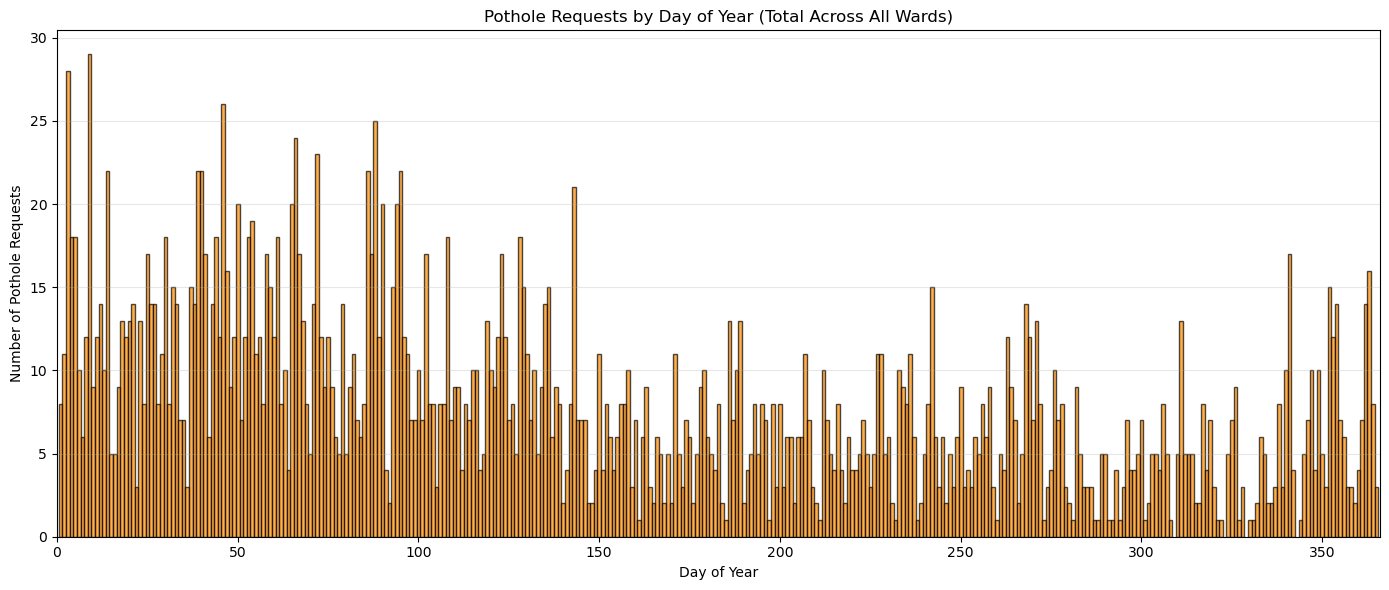


Daily statistics:
  Mean requests per day: 8.01
  Max requests in a day: 29 (Day 9)
  Min requests in a day: 1 (Day 161)


In [32]:
# Plot pothole requests by day of year
requests_by_doy = df_potholes.groupby('DAY_OF_YEAR').size()

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(requests_by_doy.index, requests_by_doy.values, color='darkorange', edgecolor='black', alpha=0.7, width=1.0)
ax.set_xlabel('Day of Year')
ax.set_ylabel('Number of Pothole Requests')
ax.set_title('Pothole Requests by Day of Year (Total Across All Wards)')
ax.set_xlim(0, 366)
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDaily statistics:")
print(f"  Mean requests per day: {requests_by_doy.mean():.2f}")
print(f"  Max requests in a day: {requests_by_doy.max()} (Day {requests_by_doy.idxmax()})")
print(f"  Min requests in a day: {requests_by_doy.min()} (Day {requests_by_doy.idxmin()})")

## Tree Pruning Requests Analysis - Day of Week & Day of Year

In [ ]:
# Find tree pruning-related services
tree_pruning_services = df[df['SERVICECODEDESCRIPTION'].str.contains('tree pruning', case=False, na=False)]['SERVICECODEDESCRIPTION'].unique()
print("Tree pruning-related services found:")
for service in tree_pruning_services:
    count = len(df[df['SERVICECODEDESCRIPTION'] == service])
    print(f"  - {service}: {count} requests")

In [ ]:
# Filter for tree pruning requests and add day of week
df_tree_pruning = df[df['SERVICECODEDESCRIPTION'].str.contains('tree pruning', case=False, na=False)].copy()
df_tree_pruning['DAY_OF_WEEK'] = df_tree_pruning['ADDDATE'].dt.dayofweek  # Monday=0, Sunday=6
df_tree_pruning['DAY_NAME'] = df_tree_pruning['ADDDATE'].dt.day_name()

print(f"Total tree pruning requests: {len(df_tree_pruning)}")

In [ ]:
# Plot tree pruning requests by day of week
requests_by_dow = df_tree_pruning.groupby('DAY_OF_WEEK').size()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(7), [requests_by_dow.get(i, 0) for i in range(7)], color='forestgreen', edgecolor='black', alpha=0.7)
ax.set_xticks(range(7))
ax.set_xticklabels(day_names, rotation=45, ha='right')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Tree Pruning Requests')
ax.set_title('Tree Pruning Requests by Day of Week (Total Across All Wards)')
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTree pruning requests by day of week:")
for i, day in enumerate(day_names):
    count = requests_by_dow.get(i, 0)
    print(f"  {day}: {count} requests")

In [ ]:
# Plot tree pruning requests by day of year
requests_by_doy = df_tree_pruning.groupby('DAY_OF_YEAR').size()

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(requests_by_doy.index, requests_by_doy.values, color='darkgreen', edgecolor='black', alpha=0.7, width=1.0)
ax.set_xlabel('Day of Year')
ax.set_ylabel('Number of Tree Pruning Requests')
ax.set_title('Tree Pruning Requests by Day of Year (Total Across All Wards)')
ax.set_xlim(0, 366)
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nDaily statistics:")
print(f"  Mean requests per day: {requests_by_doy.mean():.2f}")
print(f"  Max requests in a day: {requests_by_doy.max()} (Day {requests_by_doy.idxmax()})")
print(f"  Min requests in a day: {requests_by_doy.min()} (Day {requests_by_doy.idxmin()})")

## Density Plot of Pothole Requests per Day

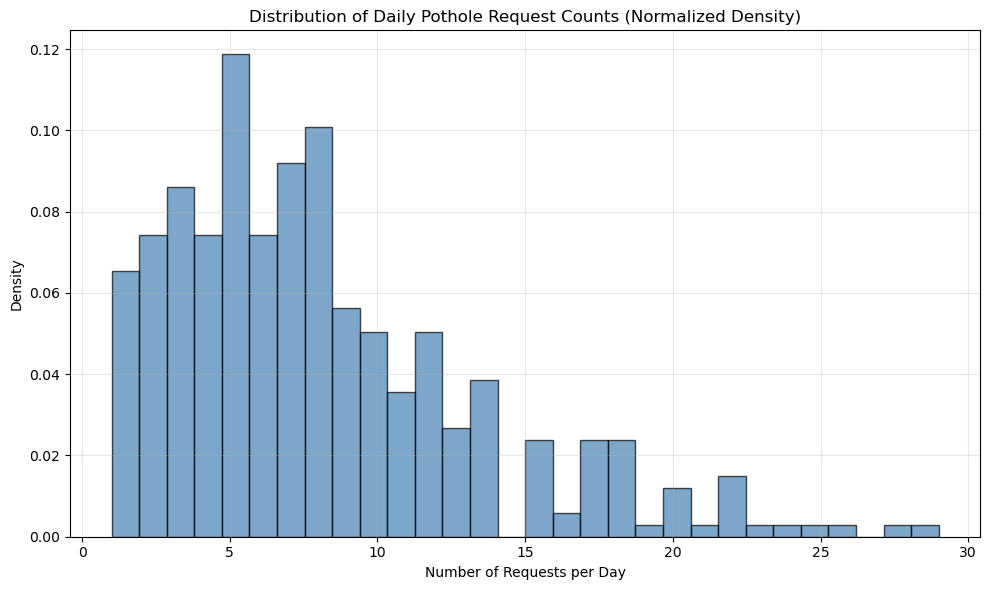

Statistics of daily pothole request counts:
  Mean: 8.01
  Median: 7.00
  Std: 5.40
  Min: 1
  Max: 29
  Total days with data: 361


In [33]:
# Get pothole requests per day of year
pothole_requests_per_day = df_potholes.groupby('DAY_OF_YEAR').size()

# Create density plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(pothole_requests_per_day.values, bins=30, density=True, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('Number of Requests per Day')
ax.set_ylabel('Density')
ax.set_title('Distribution of Daily Pothole Request Counts (Normalized Density)')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print(f"Statistics of daily pothole request counts:")
print(f"  Mean: {pothole_requests_per_day.mean():.2f}")
print(f"  Median: {pothole_requests_per_day.median():.2f}")
print(f"  Std: {pothole_requests_per_day.std():.2f}")
print(f"  Min: {pothole_requests_per_day.min()}")
print(f"  Max: {pothole_requests_per_day.max()}")
print(f"  Total days with data: {len(pothole_requests_per_day)}")

## Animated GIF: Pothole Requests by Day of Week for Each Week of Year

In [38]:
import os
from PIL import Image
import io

# Create directory for temporary images
if not os.path.exists('temp_images'):
    os.makedirs('temp_images')

# Get unique weeks
weeks = sorted(df_potholes['WEEK'].unique())
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# First pass: calculate maximum count across all weeks for consistent y-axis
max_count = 0
for week in weeks:
    week_data = df_potholes[df_potholes['WEEK'] == week]
    if len(week_data) > 0:
        requests_by_dow = week_data.groupby('DAY_OF_WEEK').size()
        max_count = max(max_count, requests_by_dow.max())

# Add some padding to max count
y_max = max_count * 1.1

# Store images for GIF
images = []

# Create histogram for each week
for week in weeks:
    week_data = df_potholes[df_potholes['WEEK'] == week]
    requests_by_dow = week_data.groupby('DAY_OF_WEEK').size()
    
    # Get counts for each day of week
    counts = [requests_by_dow.get(i, 0) for i in range(7)]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(range(7), counts, 
                   color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_xticks(range(7))
    ax.set_xticklabels(day_names, rotation=45, ha='right')
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Number of Pothole Requests')
    ax.set_title(f'Pothole Requests by Day of Week - Week {week} of 2023')
    ax.set_ylim(0, y_max)  # Consistent y-axis across all frames
    ax.grid(True, axis='y', alpha=0.3)
    
    # Add total count text
    total = len(week_data)
    ax.text(0.98, 0.95, f'Total requests: {total}', 
            transform=ax.transAxes, ha='right', va='top', 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    
    # Save to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=100)
    buf.seek(0)
    images.append(Image.open(buf).copy())
    buf.close()
    plt.close()

print(f"Created {len(images)} frames for weeks: {weeks}")
print(f"Max count across all weeks/days: {max_count}")
print(f"Consistent y-axis range: 0 to {y_max:.1f}")
print("Now creating GIF...")

Created 52 frames for weeks: [np.uint32(1), np.uint32(2), np.uint32(3), np.uint32(4), np.uint32(5), np.uint32(6), np.uint32(7), np.uint32(8), np.uint32(9), np.uint32(10), np.uint32(11), np.uint32(12), np.uint32(13), np.uint32(14), np.uint32(15), np.uint32(16), np.uint32(17), np.uint32(18), np.uint32(19), np.uint32(20), np.uint32(21), np.uint32(22), np.uint32(23), np.uint32(24), np.uint32(25), np.uint32(26), np.uint32(27), np.uint32(28), np.uint32(29), np.uint32(30), np.uint32(31), np.uint32(32), np.uint32(33), np.uint32(34), np.uint32(35), np.uint32(36), np.uint32(37), np.uint32(38), np.uint32(39), np.uint32(40), np.uint32(41), np.uint32(42), np.uint32(43), np.uint32(44), np.uint32(45), np.uint32(46), np.uint32(47), np.uint32(48), np.uint32(49), np.uint32(50), np.uint32(51), np.uint32(52)]
Max count across all weeks/days: 29
Consistent y-axis range: 0 to 31.9
Now creating GIF...


In [39]:
# Create GIF
gif_path = 'pothole_requests_weekly_animation.gif'
images[0].save(
    gif_path,
    save_all=True,
    append_images=images[1:],
    duration=200,  # milliseconds per frame
    loop=0  # loop forever
)

print(f"GIF saved to: {gif_path}")
print(f"Total frames: {len(images)}")
print(f"Duration per frame: 200ms")
print(f"Total animation duration: {len(images) * 0.2:.1f} seconds")

GIF saved to: pothole_requests_weekly_animation.gif
Total frames: 52
Duration per frame: 200ms
Total animation duration: 10.4 seconds


## All Service Code Descriptions

In [40]:
# Display all unique service code descriptions with request counts
all_services = df.groupby('SERVICECODEDESCRIPTION').size().reset_index(name='count').sort_values('count', ascending=False)

print(f"Total unique service types: {len(all_services)}\n")
print("="*100)
print(f"{'Service Code Description':<70} {'Count':>10}")
print("="*100)

for idx, row in all_services.iterrows():
    print(f"{row['SERVICECODEDESCRIPTION']:<70} {row['count']:>10,}")

print("="*100)

Total unique service types: 134

Service Code Description                                                    Count
Bulk Collection                                                            67,865
Parking Enforcement                                                        57,413
Scheduled Yard Waste                                                       27,647
Rodent Inspection and Treatment                                            17,831
Illegal Dumping                                                            16,482
Trash Collection - Missed                                                  16,269
Streetlight Repair Investigation                                           16,238
Sanitation Enforcement                                                     14,649
Roadway Signs                                                              14,558
DC Government Information                                                  14,402
Residential Parking Permit Violation                             

In [41]:
# Alternative: Return as a sorted list for easier viewing
all_services_list = sorted(df['SERVICECODEDESCRIPTION'].unique())
print(f"All service codes (alphabetically sorted):\n")
for i, service in enumerate(all_services_list, 1):
    print(f"{i:3d}. {service}")

All service codes (alphabetically sorted):

  1. 211 Warmline Service Request
  2. 311Force Reported Issues
  3. Abandoned Bicycle
  4. Abandoned Vehicle - On Private Property
  5. Abandoned Vehicle - On Public Property
  6. Alley Cleaning
  7. Alley Repair
  8. Bee Treatment and Inspection (DOH)
  9. Bee Treatment or Arboviral Inspection
 10. Bicycle Services
 11. Bulk Collection
 12. Bus/Rail Issues
 13. Christmas Tree Removal - Missed
 14. Container Removal
 15. DC Dog Park Maintenance (DGS)
 16. DC Facilities Landscaping and Grounds Maintenance(DGS)
 17. DC Government Information
 18. DC How Am I Driving?
 19. DC Indoor and Outdoor Pool Maintenance  (DGS)
 20. DC Spray Parks (DGS)
 21. DC Water - Customer Flooding
 22. DFHV - For Hire Vehicle Concerns
 23. DFHV - Lost and Found Claims (DC Taxi)
 24. DGS - Overflowing Recycling Can
 25. DGS - Playground Repair
 26. DGS Grounds Landscaping (DGS)
 27. DMV - Adjudication Supervisor
 28. DMV - Appeal
 29. DMV - Copy of Ticket
 30. DMV -

In [42]:
# Search for potentially environment-related services
environmental_keywords = ['tree', 'snow', 'ice', 'flood', 'water', 'drain', 'storm', 'leaf', 
                          'pothole', 'sidewalk', 'street', 'road', 'weather', 'erosion',
                          'lawn', 'grass', 'vegetation', 'alley', 'catch basin', 'sewer']

print("Potentially environmental/weather-related services:\n")
print("="*100)

env_services = []
for keyword in environmental_keywords:
    matching = df[df['SERVICECODEDESCRIPTION'].str.contains(keyword, case=False, na=False)]['SERVICECODEDESCRIPTION'].unique()
    for service in matching:
        if service not in env_services:
            env_services.append(service)
            count = len(df[df['SERVICECODEDESCRIPTION'] == service])
            print(f"[{keyword.upper()}] {service:<60} {count:>10,}")

print("="*100)
print(f"\nTotal environmental-related service types found: {len(env_services)}")

Potentially environmental/weather-related services:

[TREE] Streetlight Repair Investigation                                 16,238
[TREE] Tree Planting                                                     3,245
[TREE] Tree Inspection                                                   7,088
[TREE] Tree Removal                                                      2,895
[TREE] Christmas Tree Removal - Missed                                     588
[TREE] Tree Pruning                                                      4,708
[TREE] Signed Street Sweeping Missed                                       627
[TREE] Snow/Ice Removal on Public Streets                                   61
[TREE] Street Cleaning                                                   2,446
[SNOW] Snow Towing                                                           2
[SNOW] Snow Metro Bus Shelter/Stop                                          40
[SNOW] Snow/Ice Removal (Roadways AND Bridge walkways ONLY)                  8

## Animated GIF: Spatial Distribution of Pothole Requests by Day

In [43]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Get pothole data with valid coordinates
df_potholes_geo = df_potholes.dropna(subset=['LATITUDE', 'LONGITUDE']).copy()

# Get daily counts for color mapping
daily_counts = df_potholes_geo.groupby('DAY_OF_YEAR').size()

# Create a colormap normalization based on min/max daily counts
vmin = daily_counts.min()
vmax = daily_counts.max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.viridis

print(f"Total pothole requests with valid coordinates: {len(df_potholes_geo)}")
print(f"Daily count range: {vmin} to {vmax}")
print(f"Days with pothole requests: {len(daily_counts)}")

Total pothole requests with valid coordinates: 2891
Daily count range: 1 to 29
Days with pothole requests: 361


In [44]:
# Get lat/lon bounds for consistent axis limits
lat_min, lat_max = df_potholes_geo['LATITUDE'].min(), df_potholes_geo['LATITUDE'].max()
lon_min, lon_max = df_potholes_geo['LONGITUDE'].min(), df_potholes_geo['LONGITUDE'].max()

# Add some padding
lat_padding = (lat_max - lat_min) * 0.05
lon_padding = (lon_max - lon_min) * 0.05

print(f"Latitude range: {lat_min:.4f} to {lat_max:.4f}")
print(f"Longitude range: {lon_min:.4f} to {lon_max:.4f}")

Latitude range: 38.8137 to 38.9881
Longitude range: -77.1117 to -76.9124


In [45]:
# Create scatter plots for each day
import datetime

images_spatial = []
days_of_year = sorted(df_potholes_geo['DAY_OF_YEAR'].unique())

for day in days_of_year:
    day_data = df_potholes_geo[df_potholes_geo['DAY_OF_YEAR'] == day]
    daily_total = len(day_data)
    
    # Get color for this day based on total count
    color = cmap(norm(daily_total))
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Scatter plot of locations
    ax.scatter(day_data['LONGITUDE'], day_data['LATITUDE'], 
               c=[color] * len(day_data), s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    ax.set_xlim(lon_min - lon_padding, lon_max + lon_padding)
    ax.set_ylim(lat_min - lat_padding, lat_max + lat_padding)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Convert day of year to actual date for title
    date = datetime.datetime(2023, 1, 1) + datetime.timedelta(days=int(day) - 1)
    ax.set_title(f'Pothole Requests - Day {day} ({date.strftime("%B %d, %Y")})\nTotal: {daily_total} requests', 
                 fontsize=14)
    ax.grid(True, alpha=0.3)
    
    # Add colorbar reference
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label('Daily Total Requests', rotation=270, labelpad=20)
    
    plt.tight_layout()
    
    # Save to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=80)
    buf.seek(0)
    images_spatial.append(Image.open(buf).copy())
    buf.close()
    plt.close()
    
    if day % 50 == 0:
        print(f"Created frame for day {day}/{len(days_of_year)}")

print(f"\nCreated {len(images_spatial)} spatial frames")
print("Now creating GIF...")

Created frame for day 50/361
Created frame for day 100/361
Created frame for day 150/361
Created frame for day 200/361
Created frame for day 250/361
Created frame for day 300/361
Created frame for day 350/361

Created 361 spatial frames
Now creating GIF...


In [46]:
# Create GIF for spatial distribution
gif_spatial_path = 'pothole_spatial_daily_animation.gif'
images_spatial[0].save(
    gif_spatial_path,
    save_all=True,
    append_images=images_spatial[1:],
    duration=100,  # milliseconds per frame (faster than weekly animation)
    loop=0  # loop forever
)

print(f"GIF saved to: {gif_spatial_path}")
print(f"Total frames: {len(images_spatial)}")
print(f"Duration per frame: 100ms")
print(f"Total animation duration: {len(images_spatial) * 0.1:.1f} seconds")

GIF saved to: pothole_spatial_daily_animation.gif
Total frames: 361
Duration per frame: 100ms
Total animation duration: 36.1 seconds


In [ ]:
# Display the spatial GIF in notebook
from IPython.display import Image as IPImage
IPImage(filename=gif_spatial_path)